## Linear Modelling & Ablation Studies

In [94]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, r2_score, mean_squared_error, explained_variance_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

### Feature names

In [3]:
with open('../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [4]:
feature_names[:3]

['YEAR_2014', 'YEAR_2015', 'YEAR_2016']

### X and Y

In [5]:
X_train = np.load('../data/X_train.npy')

In [6]:
X_train.shape

(12648, 888)

In [7]:
X_test = np.load('../data/X_test.npy')

In [8]:
X_test.shape

(3163, 888)

In [9]:
y_train = np.load('../data/y_train.npy')

In [10]:
y_train.shape

(12648,)

In [11]:
y_test = np.load('../data/y_test.npy')

In [12]:
y_test.shape

(3163,)

### Modelling

In [13]:
model = LogisticRegression(random_state=42)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
coefficients = model.coef_[0]

In [104]:
coefficients

array([ 3.76860647e-07,  4.52314306e-07,  5.74240586e-07,  6.12570065e-07,
        5.86354671e-07,  2.54465809e-06,  5.76821902e-08,  2.60251718e-06,
       -1.76907805e-10,  2.60234028e-06,  0.00000000e+00,  2.60251718e-06,
       -1.76907805e-10,  2.60234028e-06,  0.00000000e+00,  6.41639777e-08,
        4.20261464e-08,  2.29274157e-07,  1.18469528e-07,  6.38258842e-07,
        5.27825736e-08,  4.60601217e-08,  4.37015409e-08,  3.29838432e-09,
        6.27613960e-09,  2.35558159e-09,  1.22007532e-07,  2.44881071e-07,
        3.43146451e-07,  1.27293425e-07,  2.87000123e-08,  3.68619286e-08,
        2.63397342e-08,  3.15884124e-07,  3.10849634e-08,  6.37235193e-08,
        1.51202564e-08,  6.30264870e-10,  1.32611653e-08,  2.88577730e-08,
        9.17607308e-08, -1.08322652e-10,  4.03419204e-08,  1.54648425e-08,
        1.97146766e-09,  1.19683108e-08,  2.87562665e-08,  1.90891450e-09,
        1.52164059e-07,  7.40564151e-09,  2.38386914e-08,  2.39910262e-08,
        9.72791606e-09,  

In [16]:
model.intercept_

array([2.60233958e-06])

In [105]:
indices = np.argsort(coefficients)[::-1]

In [107]:
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names))[:25]:
    print("%d. Feature %s [%d] (%f)" % (f + 1, feature_names[indices[f]], indices[f], coefficients[indices[f]]))
print('etc')

Feature ranking:
1. Feature FIRST_RESULT_F [819] (0.001515)
2. Feature FIRST_RESULT_P [821] (0.001021)
3. Feature NUM_M5_SUBJECTS [835] (0.000127)
4. Feature YR_NUM [822] (0.000118)
5. Feature NUM_M8_SUBJECTS [836] (0.000096)
6. Feature DAYS_TO_FIRST_ACCESS [843] (0.000075)
7. Feature NUM_M5_FAILS [838] (0.000073)
8. Feature DAYS_SECOND_SUBMITTED_EARLY [850] (0.000064)
9. Feature SECOND_GRADE [851] (0.000061)
10. Feature DAYS_TO_FIRST_LAB [842] (0.000059)
11. Feature NUM_EARLY_TYPE_C [864] (0.000054)
12. Feature SECOND_ASSIGN_GRADE [852] (0.000053)
13. Feature FIRST_ASSIGN_GRADE [847] (0.000052)
14. Feature NUM_CLUBS [833] (0.000052)
15. Feature NUM_MAY_TYPE_B [880] (0.000041)
16. Feature NUM_EARLY_LATES [855] (0.000038)
17. Feature SECOND_QUARTILE_RANK_4.0 [818] (0.000038)
18. Feature SECOND_GRADE_PC [853] (0.000037)
19. Feature NUM_EARLY_LOANS [840] (0.000036)
20. Feature DAYS_FIRST_SUBMITTED_EARLY [845] (0.000033)
21. Feature NUM_M1_FAILS [837] (0.000029)
22. Feature DAYS_TO_FIRST_R

In [17]:
model.score(X_test, y_test)

0.8804932026557066

In [18]:
y_pred = model.predict(X_test)

In [32]:
y_pred[:2]

array([ True,  True])

In [19]:
y_pred_int = [ int(i) for i in y_pred ]

In [33]:
y_pred_int[:2]

[1, 1]

In [21]:
y_test_int = [ int(i) for i in y_test ]

In [44]:
'{0:.5%} of the test set were predicted as True'.format(sum(y_pred_int) / float(len(y_pred_int)))

'99.96838% of the test set were predicted as True'

In [46]:
'{0:.5%} of the test set were actually True'.format(sum(y_test_int) / float(len(y_test_int)))

'88.08094% of the test set were actually True'

In [37]:
r2_score(y_test_int, y_pred_int)

-0.13833091185369817

In [38]:
mean_squared_error(y_test_int, y_pred_int)

0.1195067973442934

In [39]:
print(classification_report(y_test_int, y_pred_int))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       377
          1       0.88      1.00      0.94      2786

avg / total       0.78      0.88      0.82      3163



### Ablation studies

In [81]:
original_columns = [
    # CATEGORIES
    'YEAR',
    'EARLY_TRANSFER',
    'EARLY_CANX_LEFT',
    'EARLY_CANX_DEFER',
    'FEB_CANX_LEFT',
    'FEB_CANX_DEFER',
    'FACULTY',
    'DEPT',
    'CODE',
    'COURSE',
    'CANX',
    'PREV_FACULTY',
    'PREV_DEPT',
    'PREV_CODE',
    'PREV_COURSE',
    'PREV_CANX',
    'PREV_RESULT',
    'FIRST_FACULTY',
    'FIRST_DEPT',
    'FIRST_CODE',
    'FIRST_COURSE',
    'FIRST_CANX',
    'NEXT_CODE',
    'NEXT_RESULT',
    'Y2_RETURN',
    'PASS_M1',
    'PASS_M5',
    'PASS_M8',
    'BIO_SEX',
    'ORIGIN_CODE',
    'SCH_ADDR_CODE',
    'SCH_DEIS',
    'SCH_FEE_PAYING',
    'STUDENT_TYPE',
    'STUDENT_ADDR_CODE',
    'ADDRESS_CODE',
    'PERMANENT_ADDR_CODE',
    'ENTERPRISE_ESOC',
    'ACC_FINANCE',
    'FIRST_REL_IND',
    'FIRST_QUARTILE_RANK',
    'SECOND_REL_IND',
    'SECOND_QUARTILE_RANK',
    'FIRST_RESULT',
    # NUMBERS
    'YR_NUM',
    'TOTAL_YEARS',
    'DAYS_TO_FIRST_REG',
    'SCH_ENROLMENTS',
    'YEARS_SINCE_LC',
    'CAO_POINTS',
    'LC_MATHS_POINTS',
    'NUM_GRANTS',
    'NUM_SUBJECTS',
    'NUM_MEMBERSHIPS',
    'NUM_SOCIETIES',
    'NUM_CLUBS',
    'NUM_M1_SUBJECTS',
    'NUM_M5_SUBJECTS',
    'NUM_M8_SUBJECTS',
    'NUM_M1_FAILS',
    'NUM_M5_FAILS',
    'AGE_AT_START',
    'NUM_EARLY_LOANS',
    'DAYS_TO_FIRST_LOAN',
    'DAYS_TO_FIRST_LAB',
    'DAYS_TO_FIRST_ACCESS',
    'DAYS_TO_FIRST_DUE_DATE',
    'DAYS_FIRST_SUBMITTED_EARLY',
    'FIRST_GRADE',
    'FIRST_ASSIGN_GRADE',
    'FIRST_GRADE_PC',
    'FIRST_GRADE',
    'DAYS_TO_SECOND_DUE_DATE',
    'DAYS_SECOND_SUBMITTED_EARLY',
    'SECOND_GRADE',
    'SECOND_ASSIGN_GRADE',
    'SECOND_GRADE_PC',
    'NUM_EARLY_ASSIGNMENTS',
    'NUM_EARLY_LATES',
    'EARLY_Q1_SUBS_PC',
    'EARLY_Q2_SUBS_PC',
    'EARLY_Q3_SUBS_PC',
    'EARLY_Q4_SUBS_PC',
    'NUM_EARLY_CRM',
    'NUM_EARLY_ACCESS_DAYS',
    'NUM_EARLY_TYPE_A',
    'NUM_EARLY_TYPE_B',
    'NUM_EARLY_TYPE_C',
    'NUM_EARLY_TYPE_D',
    'NUM_EARLY_TYPE_E',
    'NUM_EARLY_TYPE_S',
    'NUM_EARLY_TYPE_X',
    'NUM_FEB_CRM',
    'NUM_FEB_ACCESS_DAYS',
    'NUM_FEB_TYPE_A',
    'NUM_FEB_TYPE_B',
    'NUM_FEB_TYPE_C',
    'NUM_FEB_TYPE_D',
    'NUM_FEB_TYPE_E',
    'NUM_FEB_TYPE_S',
    'NUM_FEB_TYPE_X',
    'NUM_MAY_CRM',
    'NUM_MAY_TYPE_A',
    'NUM_MAY_TYPE_B',
    'NUM_MAY_TYPE_C',
    'NUM_MAY_TYPE_D',
    'NUM_MAY_TYPE_E',
    'NUM_MAY_TYPE_S',
    'NUM_MAY_TYPE_X',
    'DAYS_TO_FIRST_CRM',
    'PREV_NUM_CRM',
]

In [109]:
def print_top_features(features, coefficients, indices):
    print("Feature ranking:")
    for f in range(len(features))[:25]:
        print("%d. Feature %s [%d] (%f)" % (f + 1, features[indices[f]], indices[f], coefficients[indices[f]]))
    print('etc')

In [110]:
def plot_top_features(exluded, feature_names, coefficients, indices):
    N = 10
    plt.figure(figsize=(16, 4))
    plt.title("Top-{} Feature coefficients".format(N))
    plt.bar(range(N), coefficients[indices][:N], color="b", align="center")
    plt.xticks(range(N), [ feature_names[index].replace('_', '\n') for index in indices[:N] ])
    plt.xlim([-1, N])
    plt.savefig('../figures/Ablation_Excluding_{}_Top_10_Feature_Importances.png'.format(exluded), 
                bbox_inches="tight")

Leaving Column YEAR out
['YEAR_2014', 'YEAR_2015', 'YEAR_2016', 'YEAR_2017', 'YEAR_2018', 'YEARS_SINCE_LC']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [820] (0.001515)
2. Feature CAO_POINTS [821] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [835] (0.000127)
4. Feature LC_MATHS_POINTS [822] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [836] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [843] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [838] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [850] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [851] (0.000061)
10. Feature FIRST_GRADE_PC [842] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [864] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [852] (0.000053)
13. Feature SECOND_GRADE_PC [847] (0.000052)
14. Feature AGE_AT_START [833] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [880] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [855] (0.000038)
17. Feature DAYS_TO_FIRST_REG [819] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [853] (0.000037)
19. Feat


Leaving Column DEPT out
['DEPT_BIOTECHNOLOGY', 'DEPT_CHEMICAL SCIENCES', 'DEPT_COMMUNICATIONS', 'DEPT_COMPUTING', 'DEPT_DCU BUSINESS SCHOOL', 'DEPT_DCUBS / HSS L&G Programmes', 'DEPT_EDUCATION', 'DEPT_ELECTRONIC ENGINEERING', 'DEPT_FIONTAR', 'DEPT_FIONTAR/COMMUNICATIONS', 'DEPT_Fiontar agus Scoil na Gaeilge', 'DEPT_HEALTH AND HUMAN PERFORMANCE', 'DEPT_HUMANITIES AND SOCIAL SCIENCES', 'DEPT_INSTITUTE OF EDUCATION', 'DEPT_LAW AND GOVERNMENT', 'DEPT_Language, Literacy and ECE', 'DEPT_MATHEMATICAL SCIENCES', 'DEPT_MECHANICAL ENGINEERING', 'DEPT_NURSING', 'DEPT_PHYSICAL SCIENCES', 'DEPT_SALIS', 'DEPT_STEM Ed & Global Studies', 'DEPT_THEOLOGY, PHILOSOPHY AND MUSIC']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [802] (0.001515)
2. Feature CAO_POINTS [804] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [818] (0.000127)
4. Feature LC_MATHS_POINTS [805] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [819] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [826] (0.000075)
7. F


Leaving Column CANX out
['CANX_2014.0', 'CANX_2015.0', 'CANX_2016.0', 'CANX_2017.0', 'CANX_2018.0', 'CANX_2019.0']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [819] (0.001515)
2. Feature CAO_POINTS [821] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [835] (0.000127)
4. Feature LC_MATHS_POINTS [822] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [836] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [843] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [838] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [850] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [851] (0.000061)
10. Feature FIRST_GRADE_PC [842] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [864] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [852] (0.000053)
13. Feature SECOND_GRADE_PC [847] (0.000052)
14. Feature AGE_AT_START [833] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [880] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [855] (0.000038)
17. Feature DAYS_TO_FIRST_REG [818] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [853] (0.000037)


Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [742] (0.001515)
2. Feature CAO_POINTS [744] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [758] (0.000127)
4. Feature LC_MATHS_POINTS [745] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [759] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [766] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [761] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [773] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [774] (0.000061)
10. Feature FIRST_GRADE_PC [765] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [787] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [775] (0.000053)
13. Feature SECOND_GRADE_PC [770] (0.000052)
14. Feature AGE_AT_START [756] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [803] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [778] (0.000038)
17. Feature DAYS_TO_FIRST_REG [741] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [776] (0.000037)
19. Feature FIRST_GRADE [763] (0.000036)
20. Feature SECOND_GRADE [768] (0.000033)
21. Feature DAYS_TO_FIRST_ACCESS 

Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [734] (0.001515)
2. Feature CAO_POINTS [736] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [750] (0.000127)
4. Feature LC_MATHS_POINTS [737] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [751] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [758] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [753] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [765] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [766] (0.000061)
10. Feature FIRST_GRADE_PC [757] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [779] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [767] (0.000053)
13. Feature SECOND_GRADE_PC [762] (0.000052)
14. Feature AGE_AT_START [748] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [795] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [770] (0.000038)
17. Feature DAYS_TO_FIRST_REG [733] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [768] (0.000037)
19. Feature FIRST_GRADE [755] (0.000036)
20. Feature SECOND_GRADE [760] (0.000033)
21. Feature DAYS_TO_FIRST_ACCESS 

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Leaving Column FIRST_CANX out
['FIRST_CANX_2014.0', 'FIRST_CANX_2015.0', 'FIRST_CANX_2016.0', 'FIRST_CANX_2017.0', 'FIRST_CANX_2018.0', 'FIRST_CANX_2019.0']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [819] (0.001515)
2. Feature CAO_POINTS [821] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [835] (0.000127)
4. Feature LC_MATHS_POINTS [822] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [836] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [843] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [838] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [850] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [851] (0.000061)
10. Feature FIRST_GRADE_PC [842] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [864] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [852] (0.000053)
13. Feature SECOND_GRADE_PC [847] (0.000052)
14. Feature AGE_AT_START [833] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [880] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [855] (0.000038)
17. Feature DAYS_TO_FIRST_REG [818] (0.000038)
18. 


Leaving Column PASS_M8 out
['PASS_M8_0', 'PASS_M8_N', 'PASS_M8_Y']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [822] (0.001515)
2. Feature CAO_POINTS [824] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [838] (0.000127)
4. Feature LC_MATHS_POINTS [825] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [839] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [846] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [841] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [853] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [854] (0.000061)
10. Feature FIRST_GRADE_PC [845] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [867] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [855] (0.000053)
13. Feature SECOND_GRADE_PC [850] (0.000052)
14. Feature AGE_AT_START [836] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [883] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [858] (0.000038)
17. Feature DAYS_TO_FIRST_REG [821] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [856] (0.000037)
19. Feature FIRST_GRADE [843] (0.000036)
20. Fea


Leaving Column STUDENT_ADDR_CODE out
['STUDENT_ADDR_CODE_0.0', 'STUDENT_ADDR_CODE_1.0', 'STUDENT_ADDR_CODE_2.0', 'STUDENT_ADDR_CODE_3.0', 'STUDENT_ADDR_CODE_4.0', 'STUDENT_ADDR_CODE_5.0', 'STUDENT_ADDR_CODE_6.0', 'STUDENT_ADDR_CODE_7.0', 'STUDENT_ADDR_CODE_8.0', 'STUDENT_ADDR_CODE_9.0', 'STUDENT_ADDR_CODE_10.0', 'STUDENT_ADDR_CODE_11.0']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [813] (0.001515)
2. Feature CAO_POINTS [815] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [829] (0.000127)
4. Feature LC_MATHS_POINTS [816] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [830] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [837] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [832] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [844] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [845] (0.000061)
10. Feature FIRST_GRADE_PC [836] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [858] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [846] (0.000053)
13. Feature SECOND_GRADE_PC [841] (0.000052)
14. Feat


Leaving Column FIRST_QUARTILE_RANK out
['FIRST_QUARTILE_RANK_1.0', 'FIRST_QUARTILE_RANK_2.0', 'FIRST_QUARTILE_RANK_3.0', 'FIRST_QUARTILE_RANK_4.0']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [821] (0.001515)
2. Feature CAO_POINTS [823] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [837] (0.000127)
4. Feature LC_MATHS_POINTS [824] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [838] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [845] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [840] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [852] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [853] (0.000061)
10. Feature FIRST_GRADE_PC [844] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [866] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [854] (0.000053)
13. Feature SECOND_GRADE_PC [849] (0.000052)
14. Feature AGE_AT_START [835] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [882] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [857] (0.000038)
17. Feature DAYS_TO_FIRST_REG [820] (0.000038)
18. Feature E


Leaving Column SCH_ENROLMENTS out
['SCH_ENROLMENTS']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SECOND_ASSIGN_GRADE [851] (0.000000)
2. Feature FIRST_ASSIGN_GRADE [846] (0.000000)
3. Feature CAO_POINTS [826] (0.000000)
4. Feature DAYS_TO_FIRST_LOAN [840] (0.000000)
5. Feature LC_MATHS_POINTS [827] (0.000000)
6. Feature DAYS_TO_FIRST_LAB [841] (0.000000)
7. Feature DAYS_TO_SECOND_DUE_DATE [848] (0.000000)
8. Feature DAYS_TO_FIRST_DUE_DATE [843] (0.000000)
9. Feature EARLY_Q1_SUBS_PC [855] (0.000000)
10. Feature EARLY_Q2_SUBS_PC [856] (0.000000)
11. Feature FIRST_GRADE_PC [847] (0.000000)
12. Feature NUM_FEB_ACCESS_DAYS [869] (0.000000)
13. Feature EARLY_Q3_SUBS_PC [857] (0.000000)
14. Feature SECOND_GRADE_PC [852] (0.000000)
15. Feature AGE_AT_START [838] (0.000000)
16. Feature DAYS_TO_FIRST_CRM [885] (0.000000)
17. Feature EARLY_Q4_SUBS_PC [858] (0.000000)
18. Feature NUM_EARLY_ACCESS_DAYS [860] (0.000000)
19. Feature DAYS_TO_FIRST_REG [824] (0.000000)
20. Featu


Leaving Column NUM_SOCIETIES out
['NUM_SOCIETIES']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.001515)
2. Feature CAO_POINTS [827] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [840] (0.000127)
4. Feature LC_MATHS_POINTS [828] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [841] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [848] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [843] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [855] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [856] (0.000061)
10. Feature FIRST_GRADE_PC [847] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [869] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [857] (0.000053)
13. Feature SECOND_GRADE_PC [852] (0.000052)
14. Feature AGE_AT_START [838] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [885] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [860] (0.000038)
17. Feature DAYS_TO_FIRST_REG [824] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [858] (0.000037)
19. Feature FIRST_GRADE [845] (0.000036)
20. Feature SECOND_GRAD


Leaving Column AGE_AT_START out
['AGE_AT_START']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.001516)
2. Feature CAO_POINTS [827] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [840] (0.000127)
4. Feature LC_MATHS_POINTS [828] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [841] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [848] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [843] (0.000074)
8. Feature EARLY_Q1_SUBS_PC [855] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [856] (0.000061)
10. Feature FIRST_GRADE_PC [847] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [869] (0.000055)
12. Feature EARLY_Q3_SUBS_PC [857] (0.000053)
13. Feature SECOND_GRADE_PC [852] (0.000052)
14. Feature DAYS_TO_FIRST_CRM [885] (0.000041)
15. Feature NUM_EARLY_ACCESS_DAYS [860] (0.000038)
16. Feature DAYS_TO_FIRST_REG [824] (0.000038)
17. Feature EARLY_Q4_SUBS_PC [858] (0.000037)
18. Feature FIRST_GRADE [845] (0.000036)
19. Feature SECOND_GRADE [850] (0.000033)
20. Feature DAYS_TO_FIRST


Leaving Column FIRST_GRADE out
['FIRST_GRADE', 'FIRST_GRADE_PC']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.001517)
2. Feature CAO_POINTS [827] (0.001022)
3. Feature DAYS_TO_FIRST_LOAN [841] (0.000127)
4. Feature LC_MATHS_POINTS [828] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [842] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [847] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [844] (0.000074)
8. Feature EARLY_Q1_SUBS_PC [854] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [855] (0.000061)
10. Feature NUM_FEB_ACCESS_DAYS [868] (0.000055)
11. Feature EARLY_Q3_SUBS_PC [856] (0.000053)
12. Feature SECOND_GRADE_PC [851] (0.000052)
13. Feature AGE_AT_START [839] (0.000052)
14. Feature DAYS_TO_FIRST_CRM [884] (0.000041)
15. Feature NUM_EARLY_ACCESS_DAYS [859] (0.000039)
16. Feature DAYS_TO_FIRST_REG [824] (0.000038)
17. Feature EARLY_Q4_SUBS_PC [857] (0.000037)
18. Feature SECOND_GRADE [849] (0.000033)
19. Feature DAYS_TO_FIRST_ACCESS [843] (0.000029)
20


Leaving Column SECOND_ASSIGN_GRADE out
['SECOND_ASSIGN_GRADE']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.000414)
2. Feature CAO_POINTS [827] (0.000272)
3. Feature DAYS_TO_FIRST_LOAN [841] (0.000033)
4. Feature LC_MATHS_POINTS [828] (0.000031)
5. Feature DAYS_TO_FIRST_LAB [842] (0.000025)
6. Feature DAYS_TO_SECOND_DUE_DATE [849] (0.000019)
7. Feature DAYS_TO_FIRST_DUE_DATE [844] (0.000019)
8. Feature EARLY_Q1_SUBS_PC [855] (0.000016)
9. Feature EARLY_Q2_SUBS_PC [856] (0.000016)
10. Feature FIRST_GRADE_PC [848] (0.000015)
11. Feature NUM_FEB_ACCESS_DAYS [869] (0.000014)
12. Feature EARLY_Q3_SUBS_PC [857] (0.000014)
13. Feature SECOND_GRADE_PC [852] (0.000014)
14. Feature AGE_AT_START [839] (0.000013)
15. Feature DAYS_TO_FIRST_CRM [885] (0.000011)
16. Feature EARLY_Q4_SUBS_PC [858] (0.000010)
17. Feature NUM_EARLY_ACCESS_DAYS [860] (0.000010)
18. Feature DAYS_TO_FIRST_REG [824] (0.000010)
19. Feature FIRST_GRADE [846] (0.000009)
20. Feature


Leaving Column EARLY_Q4_SUBS_PC out
['EARLY_Q4_SUBS_PC']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.001516)
2. Feature CAO_POINTS [827] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [841] (0.000127)
4. Feature LC_MATHS_POINTS [828] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [842] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [849] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [844] (0.000074)
8. Feature EARLY_Q1_SUBS_PC [856] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [857] (0.000061)
10. Feature FIRST_GRADE_PC [848] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [869] (0.000055)
12. Feature EARLY_Q3_SUBS_PC [858] (0.000053)
13. Feature SECOND_GRADE_PC [853] (0.000052)
14. Feature AGE_AT_START [839] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [885] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [860] (0.000038)
17. Feature DAYS_TO_FIRST_REG [824] (0.000038)
18. Feature FIRST_GRADE [846] (0.000036)
19. Feature SECOND_GRADE [851] (0.000033)
20. Feature DAYS_TO_F


Leaving Column NUM_EARLY_TYPE_E out
['NUM_EARLY_TYPE_E']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.001515)
2. Feature CAO_POINTS [827] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [841] (0.000127)
4. Feature LC_MATHS_POINTS [828] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [842] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [849] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [844] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [856] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [857] (0.000061)
10. Feature FIRST_GRADE_PC [848] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [869] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [858] (0.000053)
13. Feature SECOND_GRADE_PC [853] (0.000052)
14. Feature AGE_AT_START [839] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [885] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [861] (0.000038)
17. Feature DAYS_TO_FIRST_REG [824] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [859] (0.000037)
19. Feature FIRST_GRADE [846] (0.000036)
20. Feature SECON


Leaving Column NUM_FEB_TYPE_C out
['NUM_FEB_TYPE_C']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.001515)
2. Feature CAO_POINTS [827] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [841] (0.000127)
4. Feature LC_MATHS_POINTS [828] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [842] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [849] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [844] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [856] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [857] (0.000061)
10. Feature FIRST_GRADE_PC [848] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [870] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [858] (0.000053)
13. Feature SECOND_GRADE_PC [853] (0.000052)
14. Feature AGE_AT_START [839] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [885] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [861] (0.000038)
17. Feature DAYS_TO_FIRST_REG [824] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [859] (0.000037)
19. Feature FIRST_GRADE [846] (0.000036)
20. Feature SECOND_GR


Leaving Column NUM_MAY_TYPE_B out
['NUM_MAY_TYPE_B']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.001515)
2. Feature CAO_POINTS [827] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [841] (0.000127)
4. Feature LC_MATHS_POINTS [828] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [842] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [849] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [844] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [856] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [857] (0.000061)
10. Feature FIRST_GRADE_PC [848] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [870] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [858] (0.000053)
13. Feature SECOND_GRADE_PC [853] (0.000052)
14. Feature AGE_AT_START [839] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [885] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [861] (0.000038)
17. Feature DAYS_TO_FIRST_REG [824] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [859] (0.000037)
19. Feature FIRST_GRADE [846] (0.000036)
20. Feature SECOND_GR


Leaving Column PREV_NUM_CRM out
['PREV_NUM_CRM']
Score: 0.8805	 R2:-0.1383	 MSE:0.1195
Feature ranking:
1. Feature SCH_ENROLMENTS [825] (0.001515)
2. Feature CAO_POINTS [827] (0.001021)
3. Feature DAYS_TO_FIRST_LOAN [841] (0.000127)
4. Feature LC_MATHS_POINTS [828] (0.000118)
5. Feature DAYS_TO_FIRST_LAB [842] (0.000096)
6. Feature DAYS_TO_SECOND_DUE_DATE [849] (0.000075)
7. Feature DAYS_TO_FIRST_DUE_DATE [844] (0.000073)
8. Feature EARLY_Q1_SUBS_PC [856] (0.000064)
9. Feature EARLY_Q2_SUBS_PC [857] (0.000061)
10. Feature FIRST_GRADE_PC [848] (0.000059)
11. Feature NUM_FEB_ACCESS_DAYS [870] (0.000054)
12. Feature EARLY_Q3_SUBS_PC [858] (0.000053)
13. Feature SECOND_GRADE_PC [853] (0.000052)
14. Feature AGE_AT_START [839] (0.000052)
15. Feature DAYS_TO_FIRST_CRM [886] (0.000041)
16. Feature NUM_EARLY_ACCESS_DAYS [861] (0.000038)
17. Feature DAYS_TO_FIRST_REG [824] (0.000038)
18. Feature EARLY_Q4_SUBS_PC [859] (0.000037)
19. Feature FIRST_GRADE [846] (0.000036)
20. Feature SECOND_GRADE 

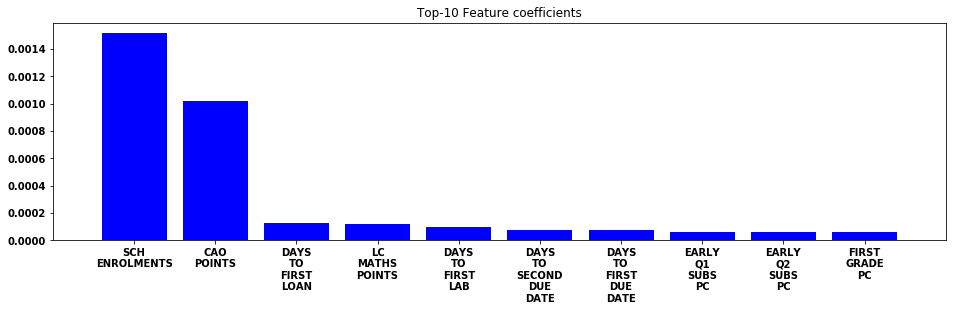

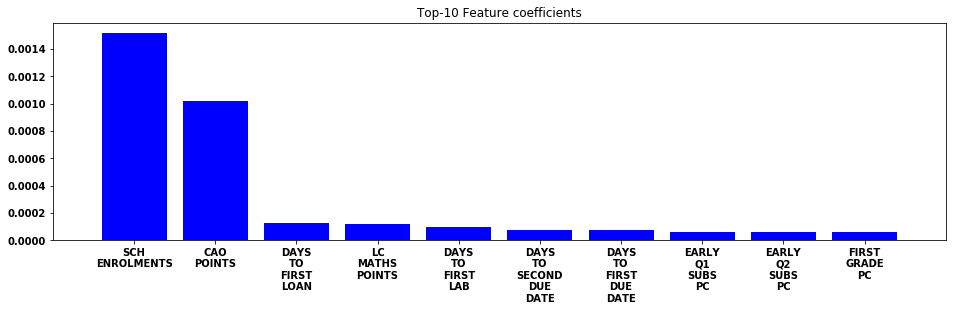

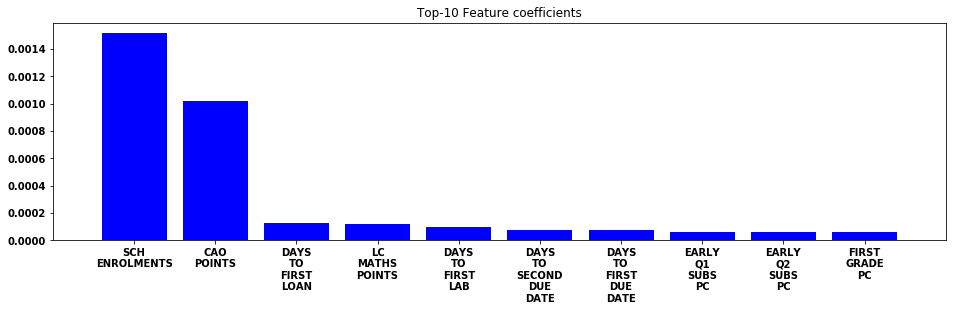

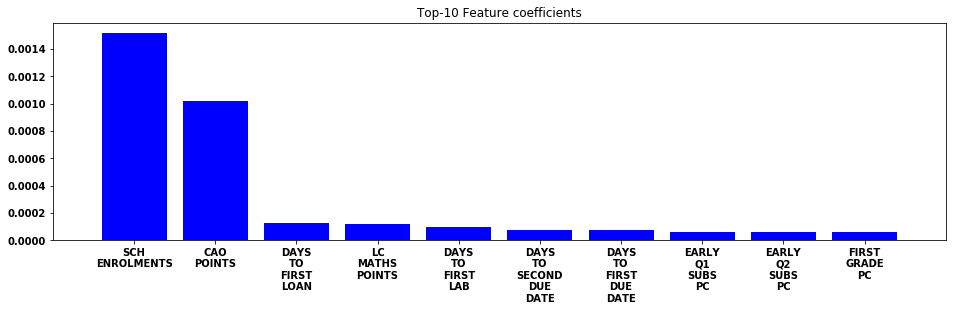

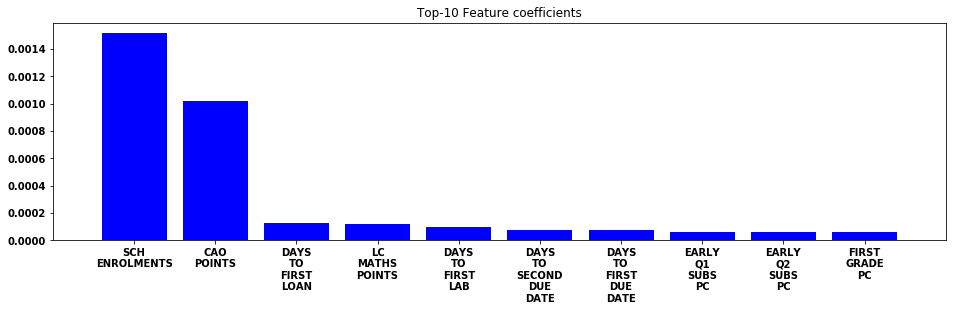

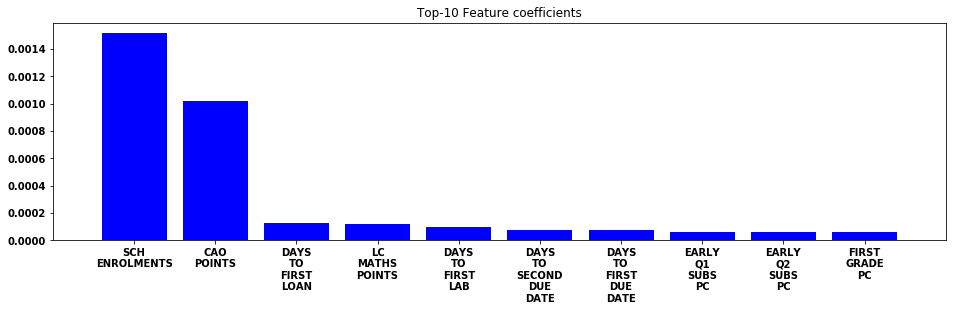

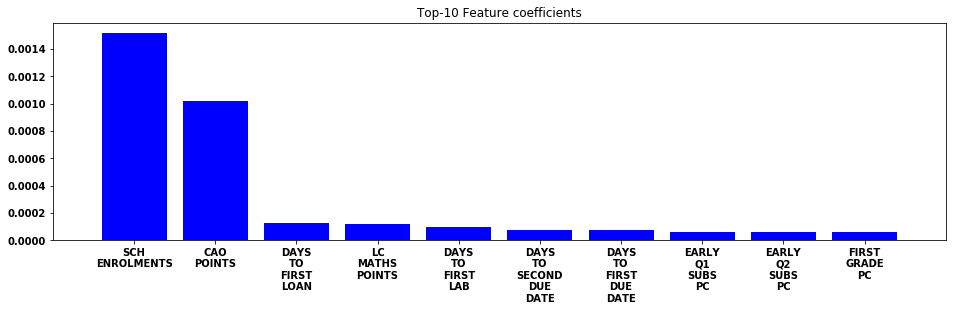

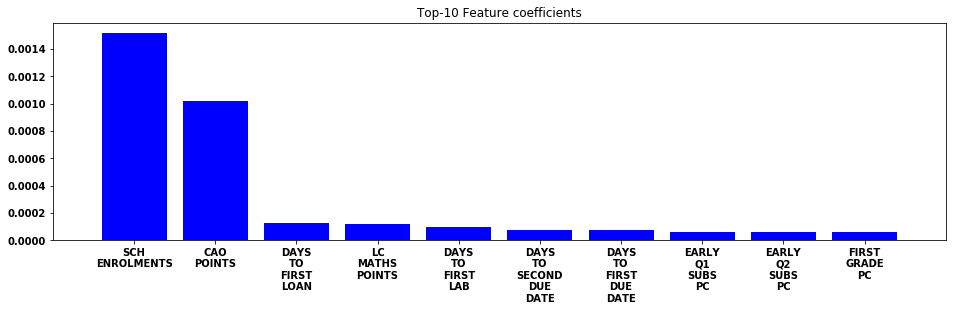

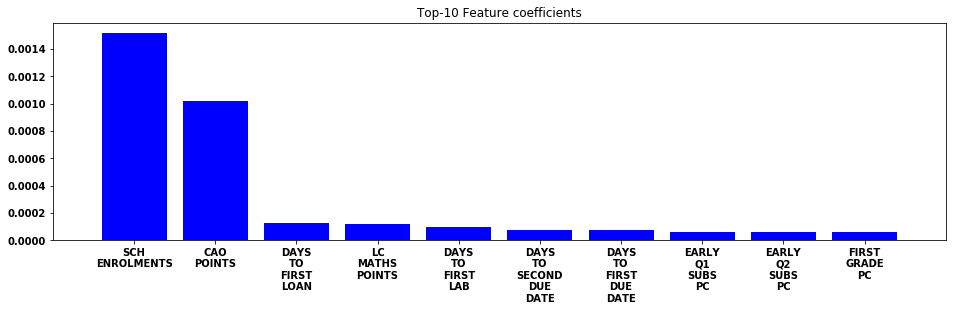

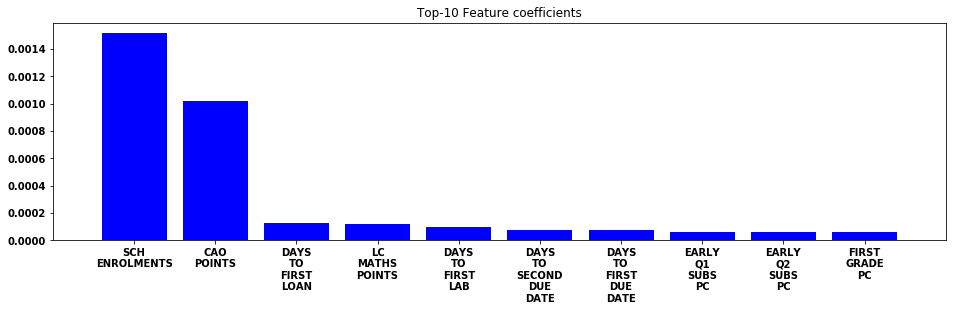

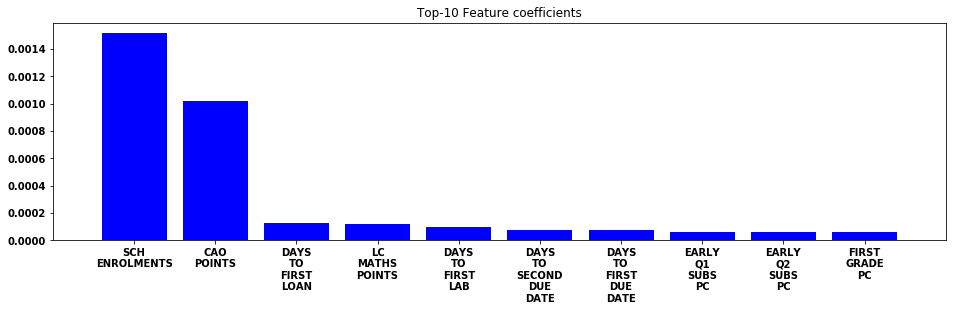

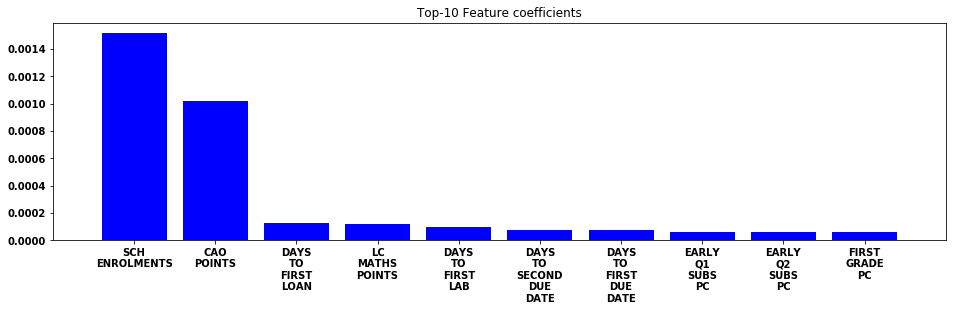

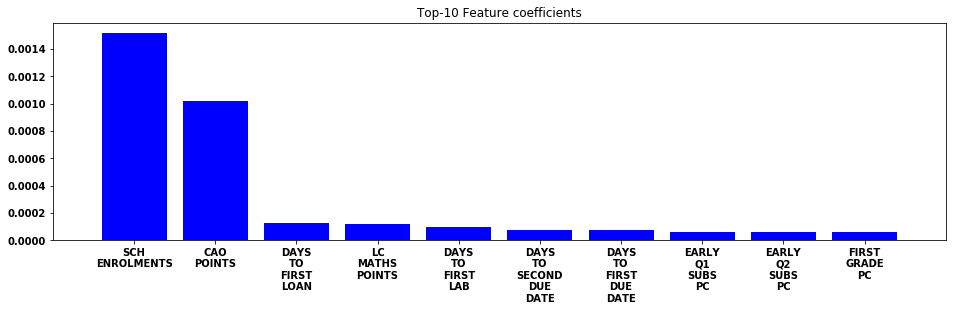

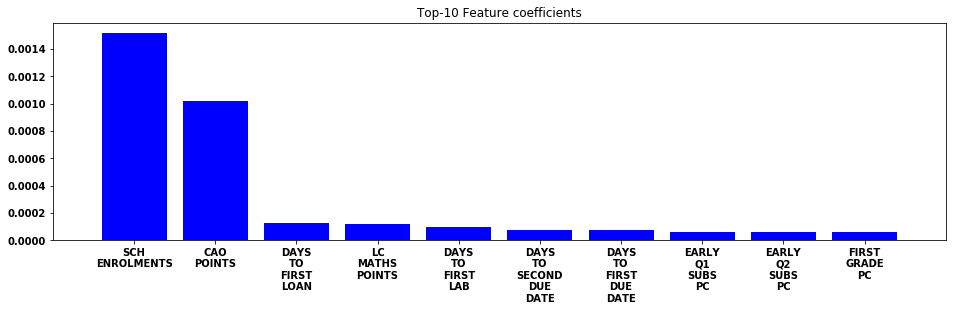

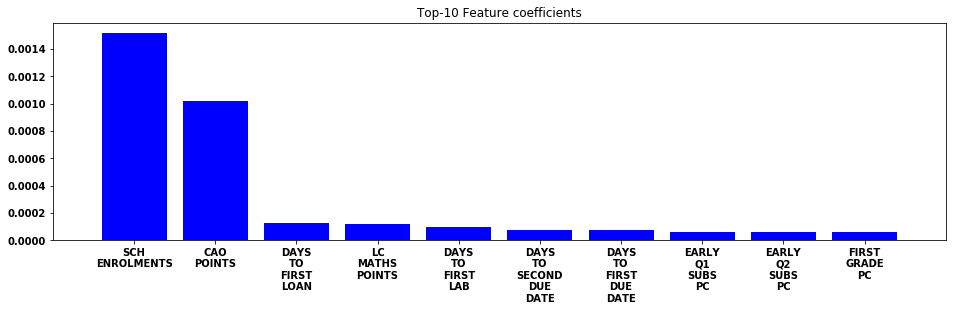

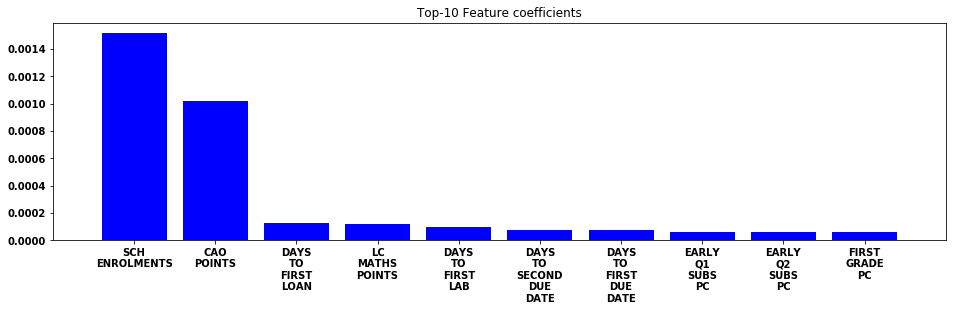

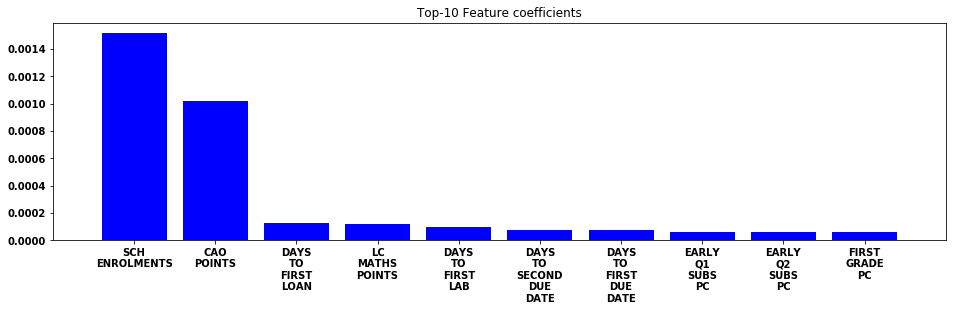

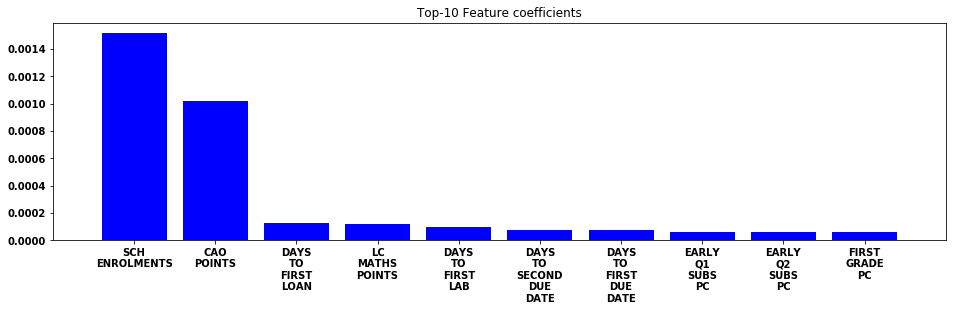

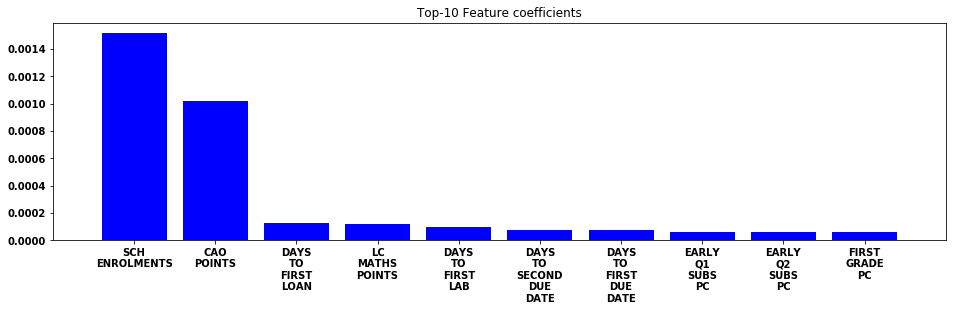

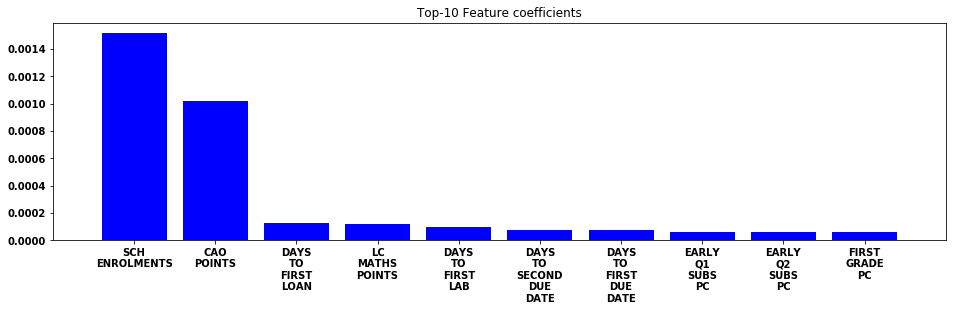

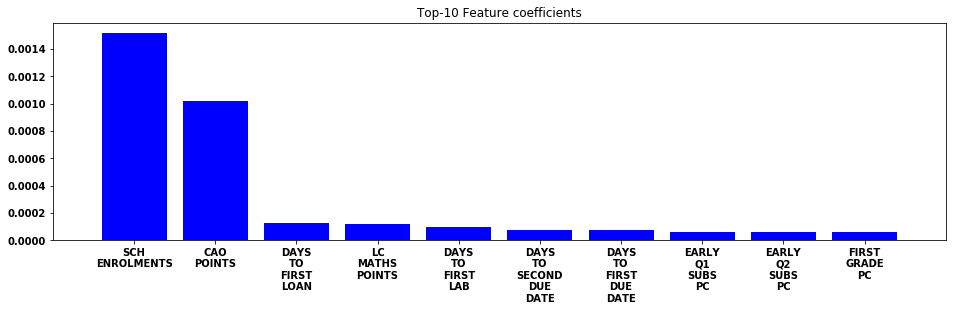

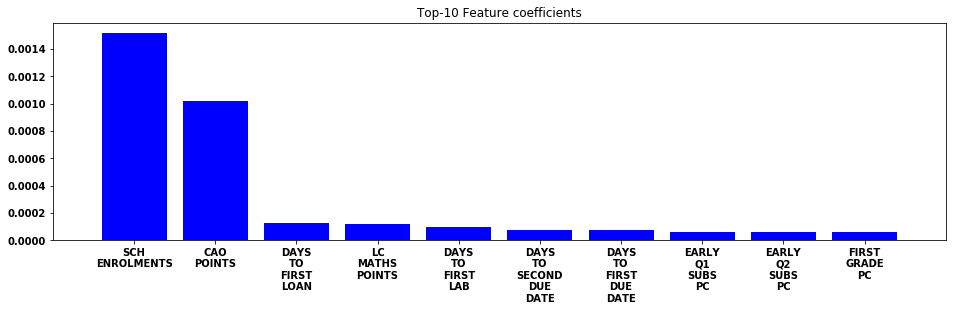

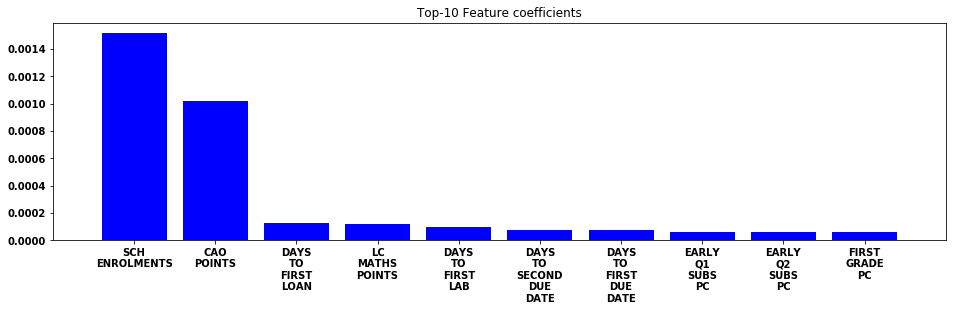

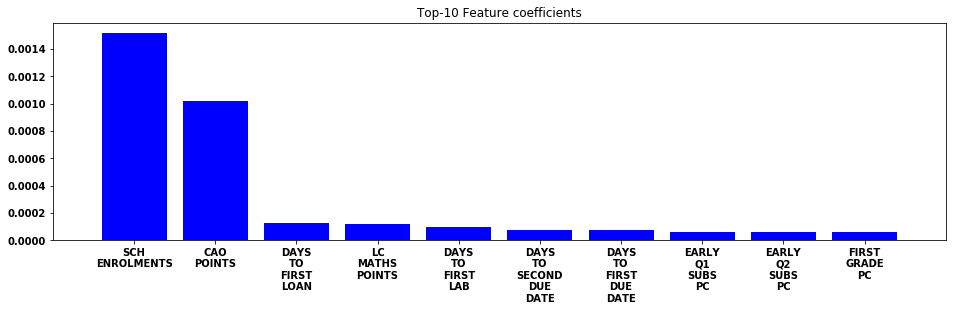

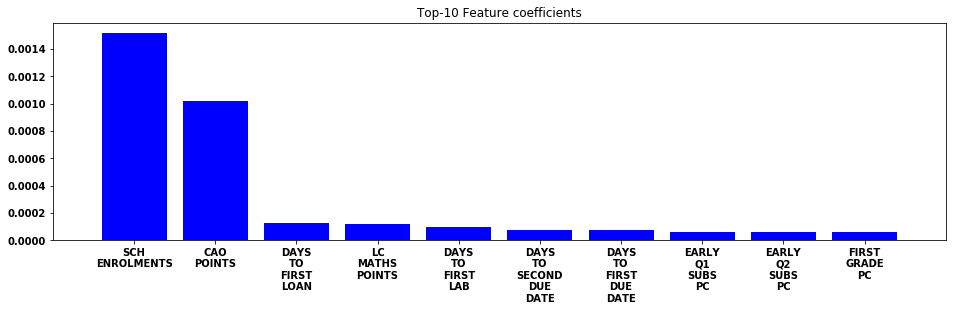

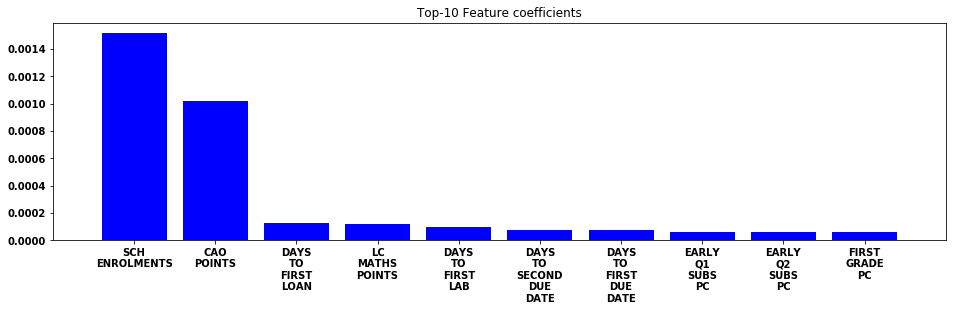

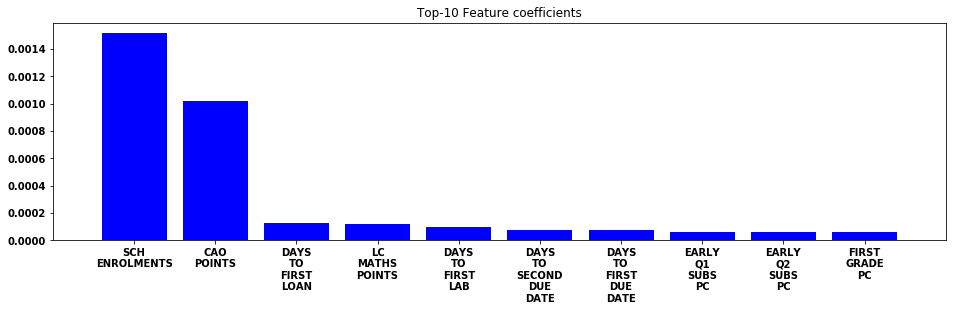

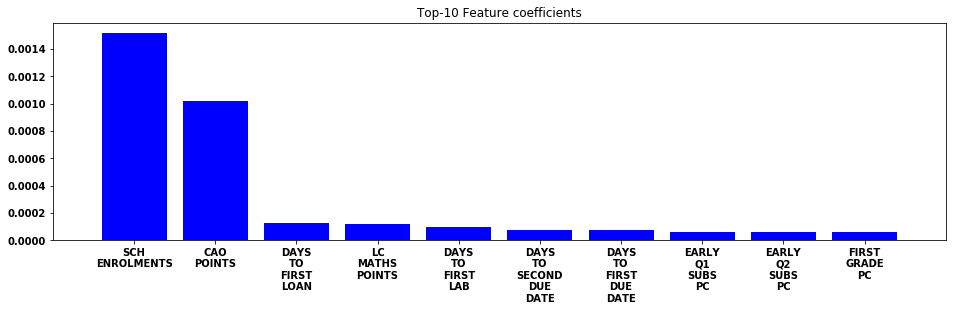

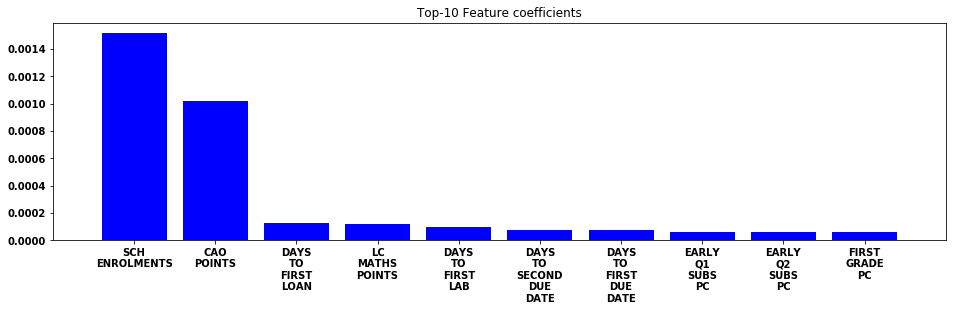

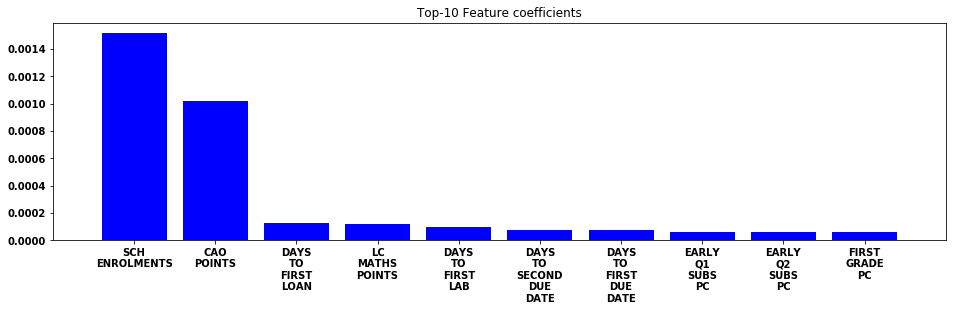

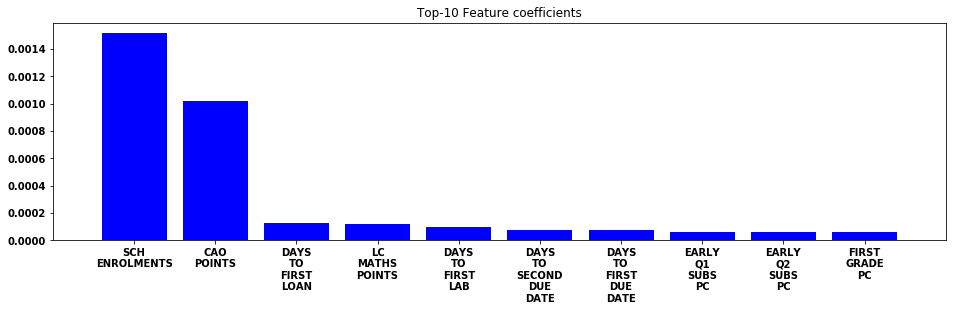

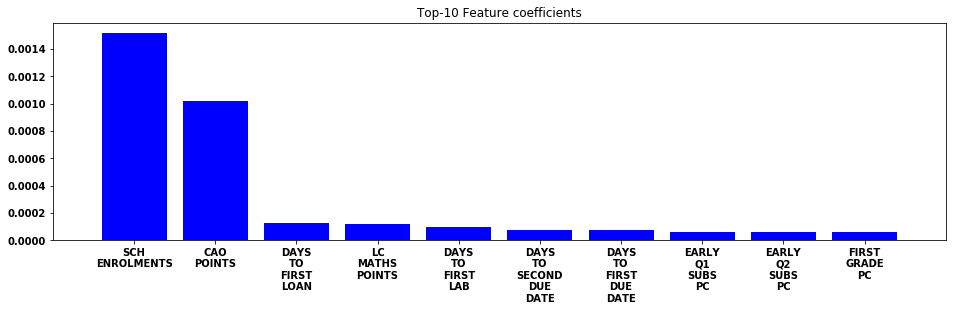

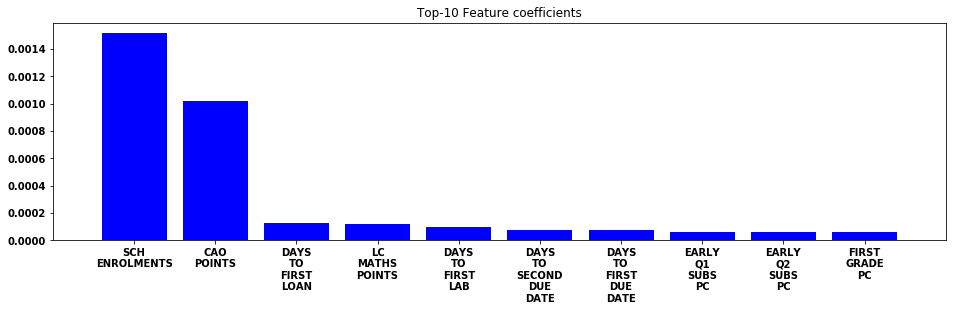

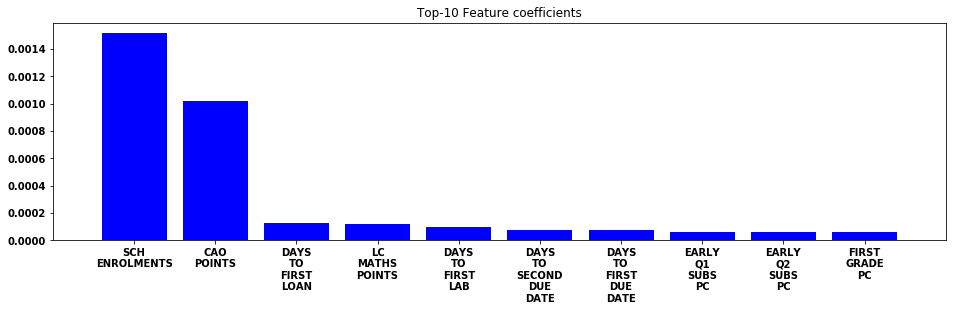

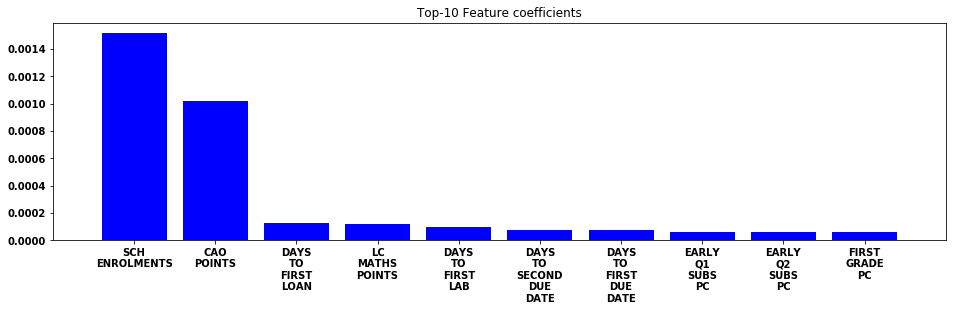

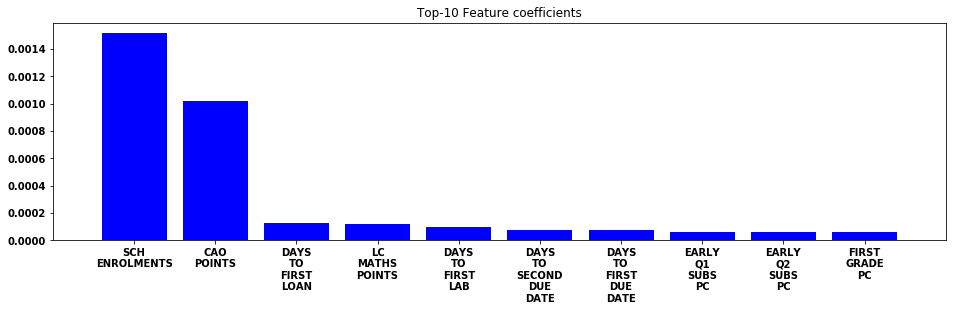

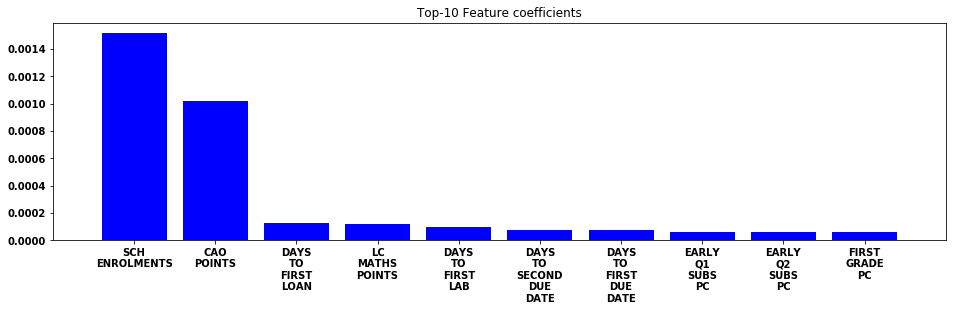

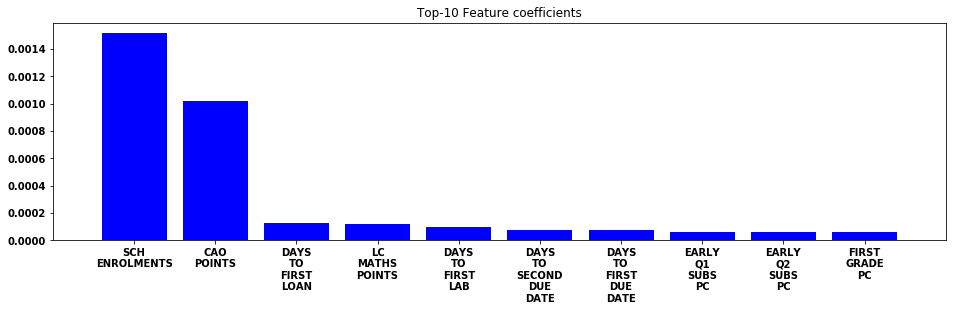

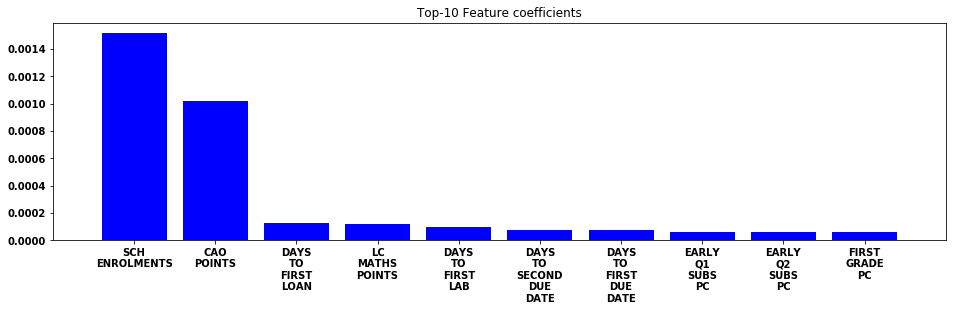

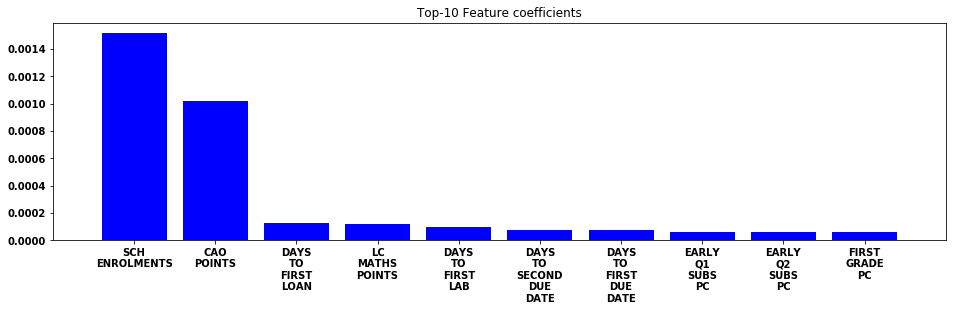

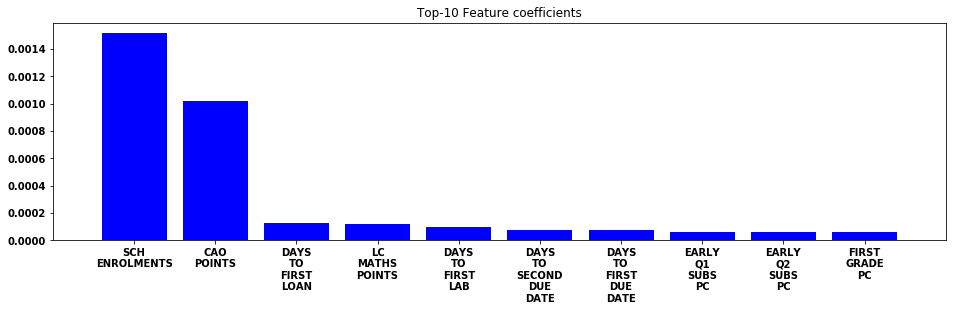

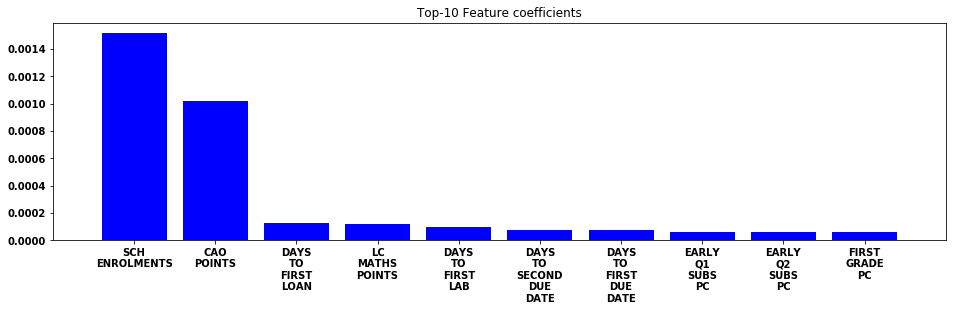

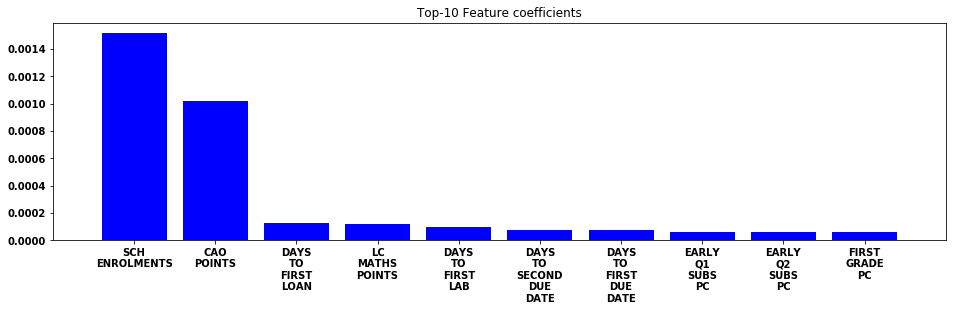

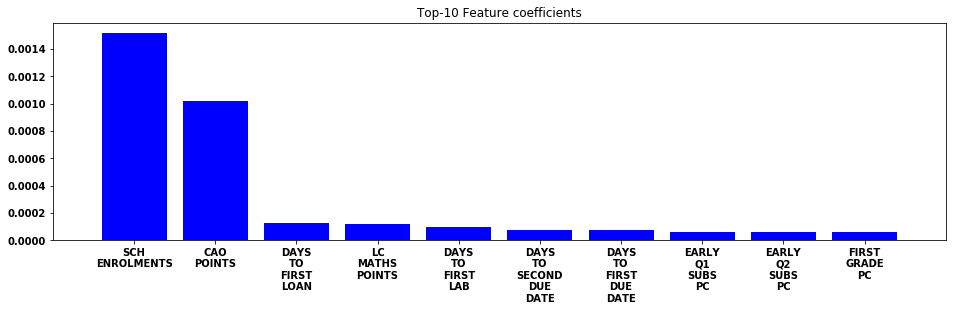

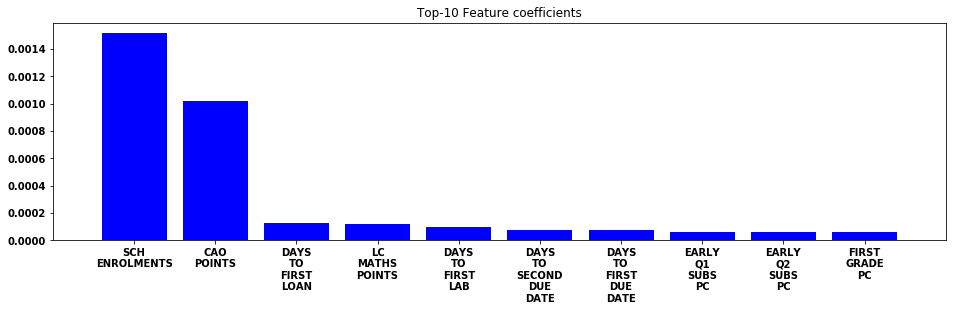

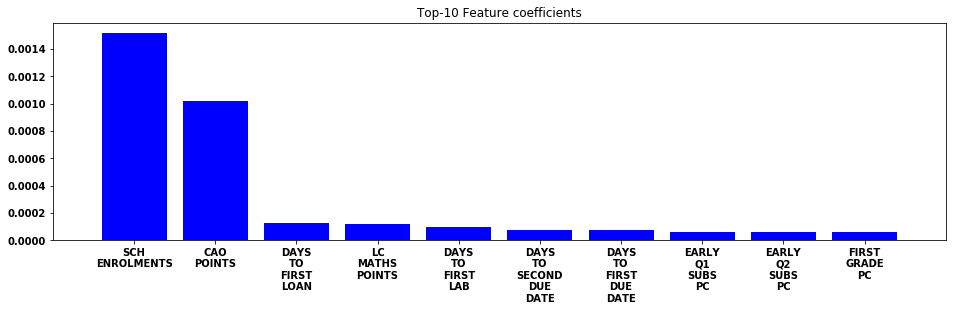

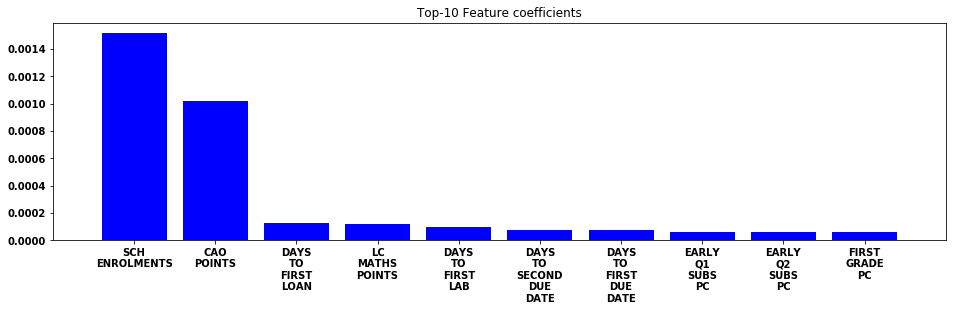

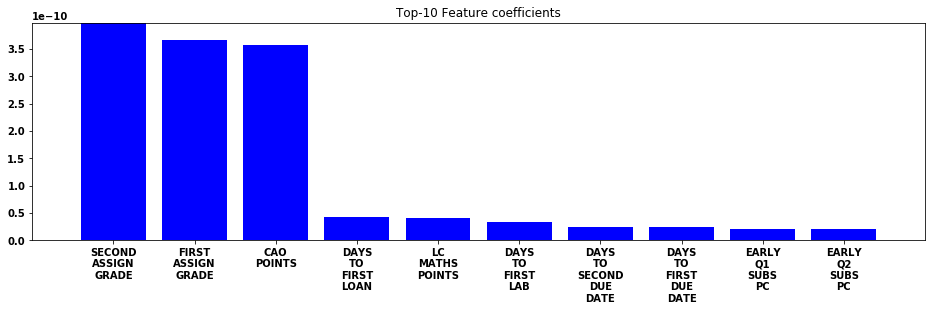

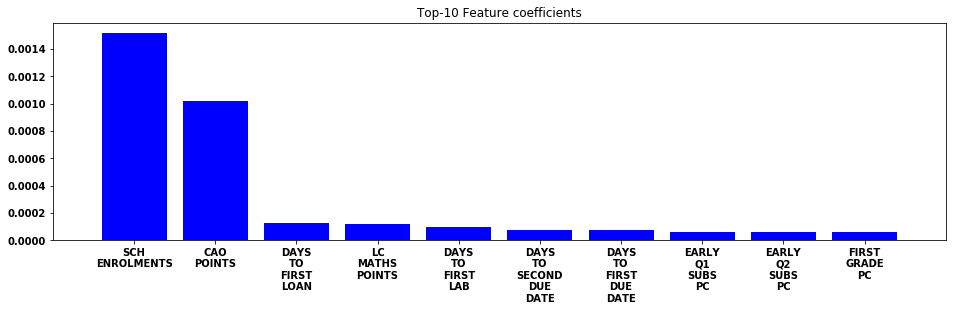

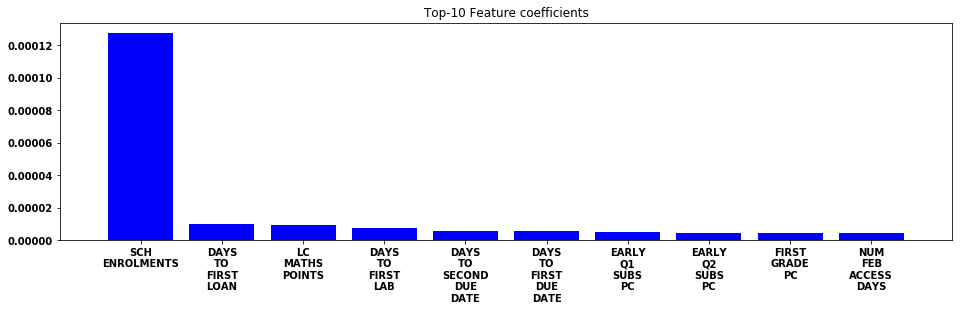

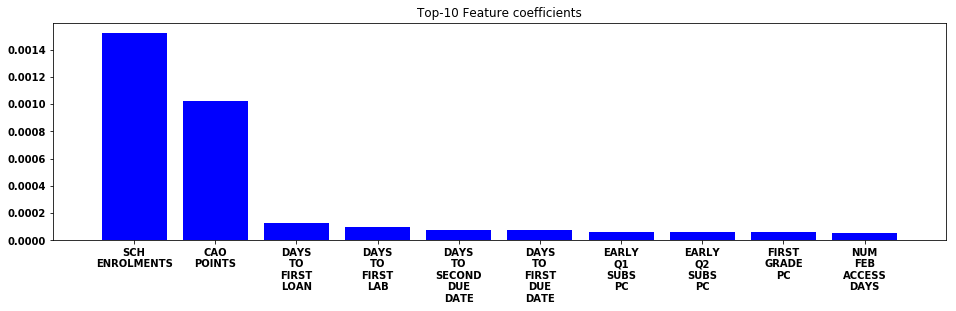

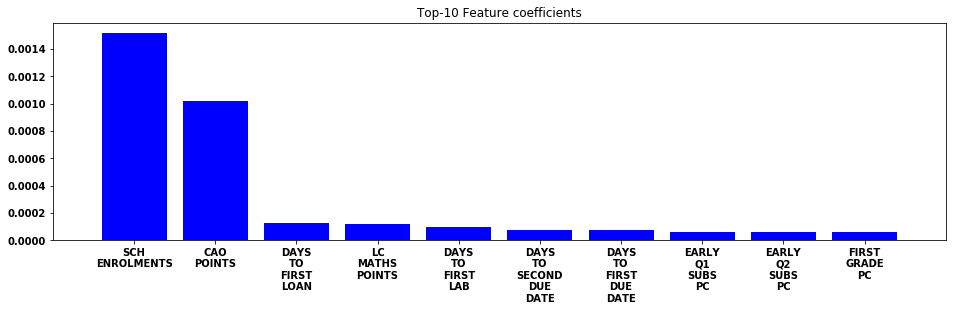

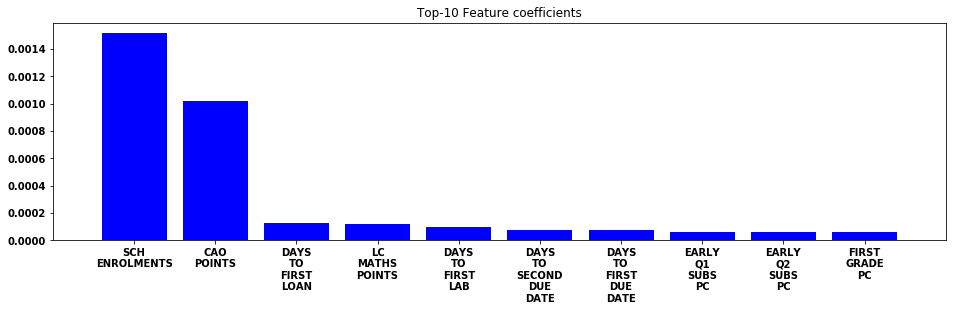

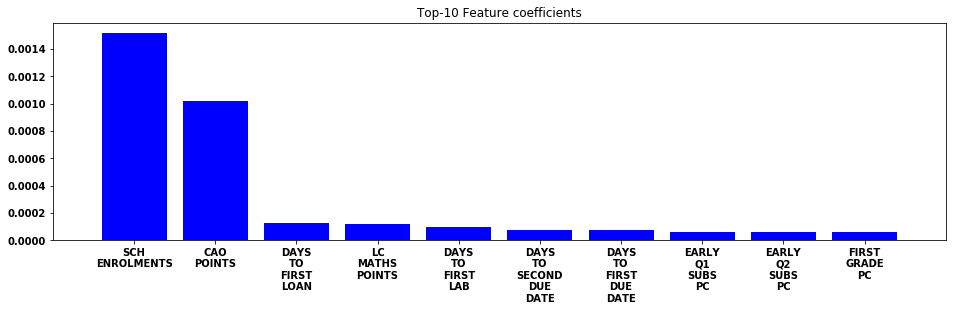

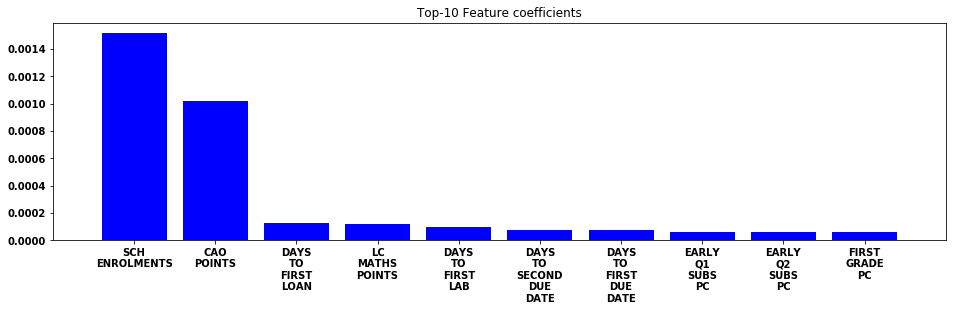

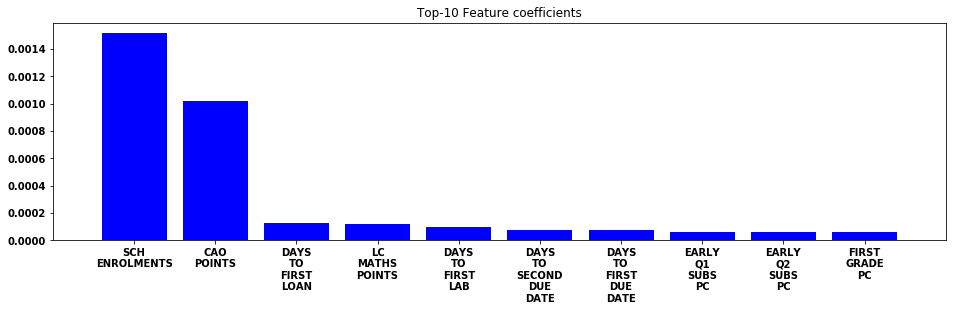

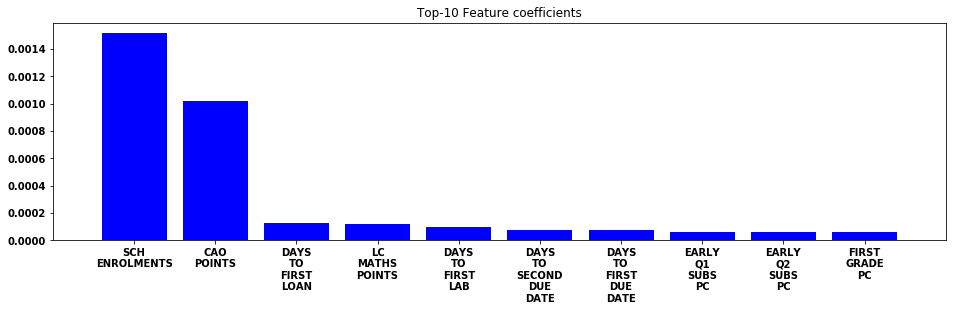

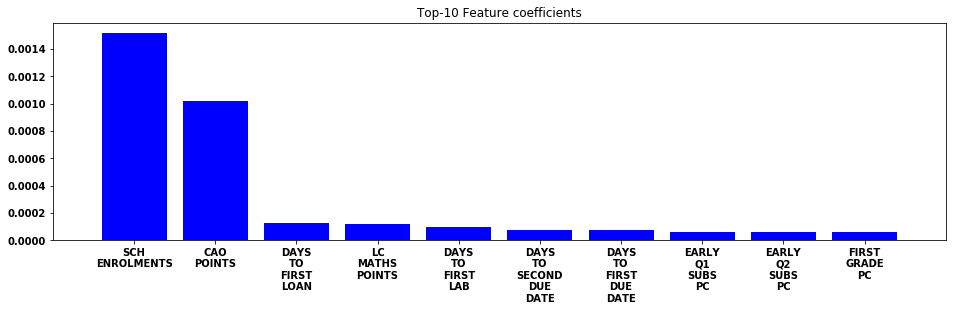

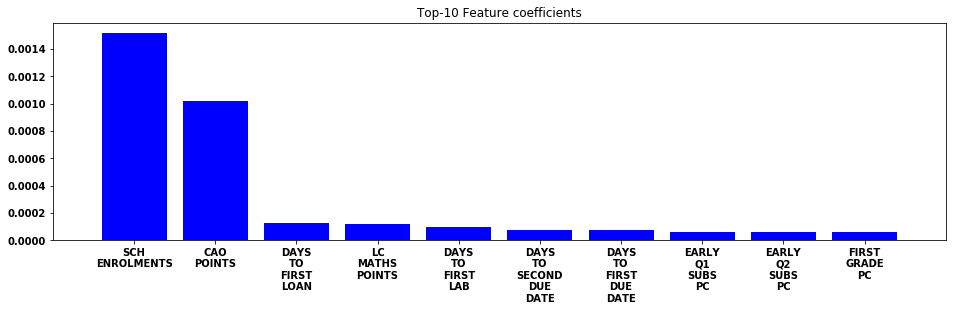

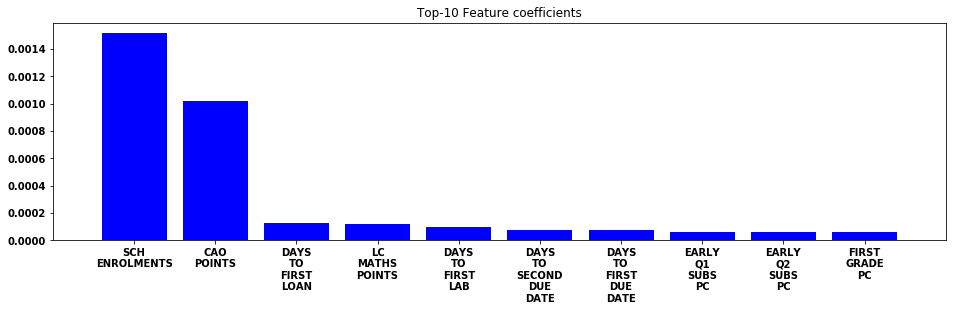

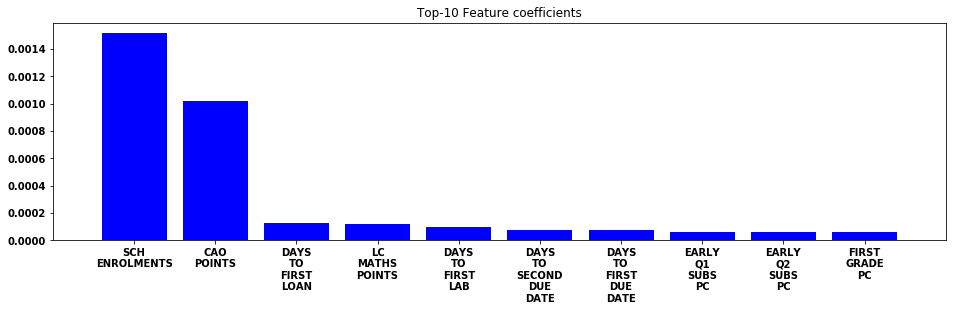

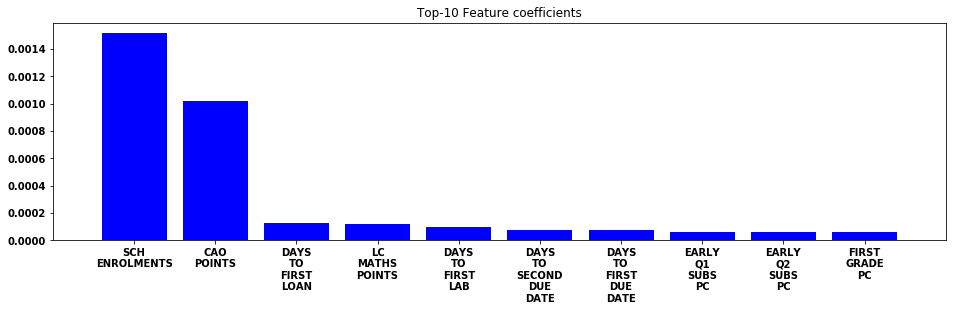

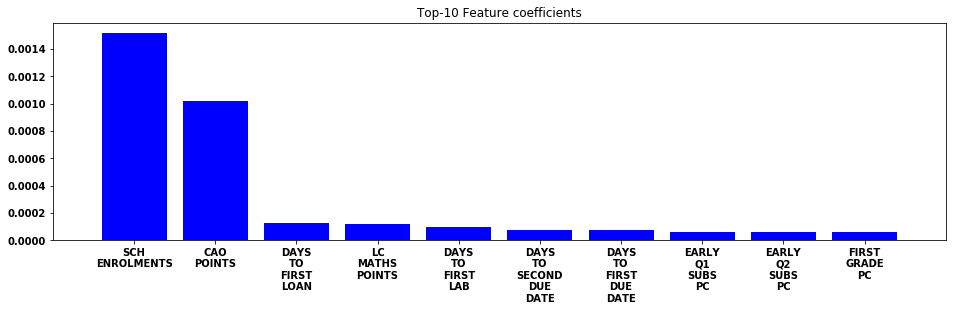

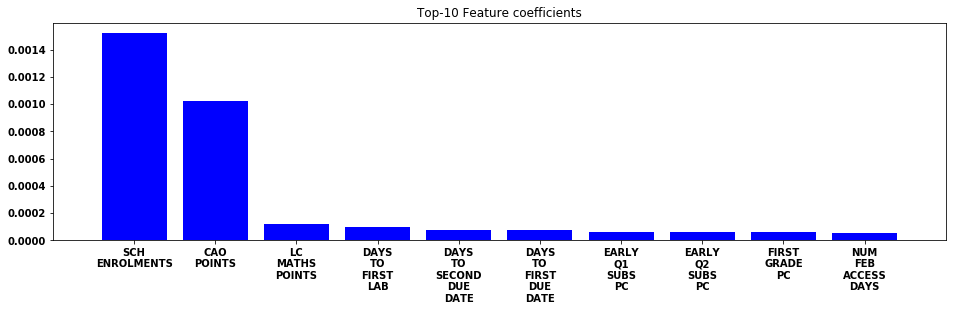

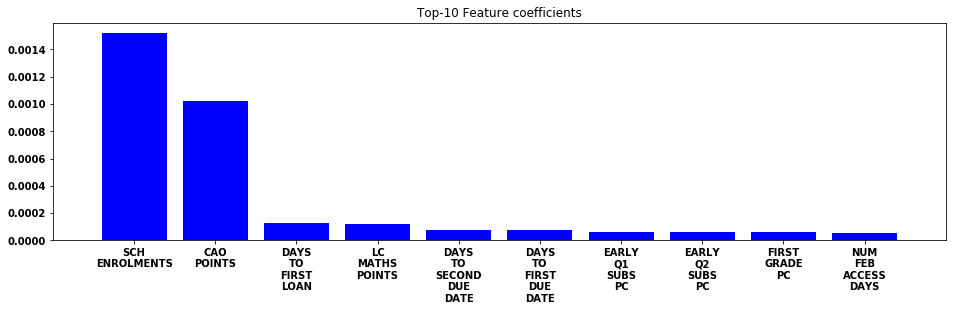

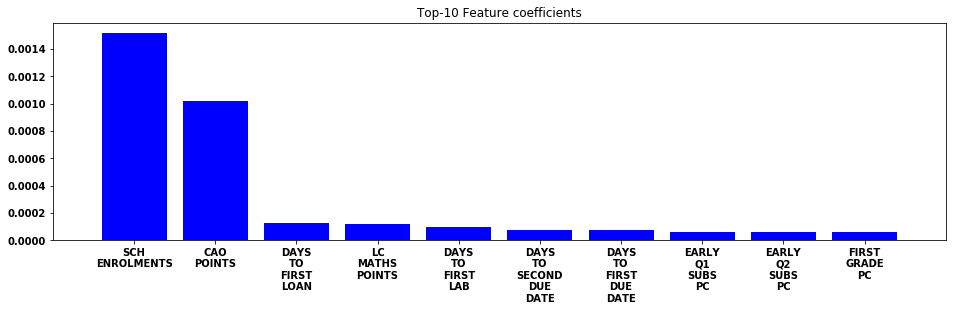

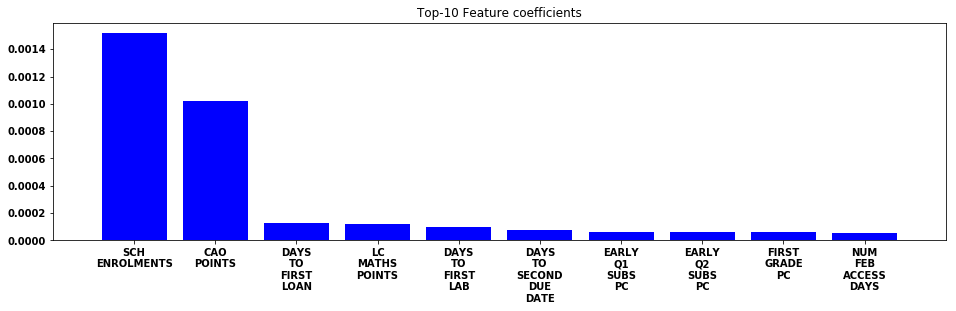

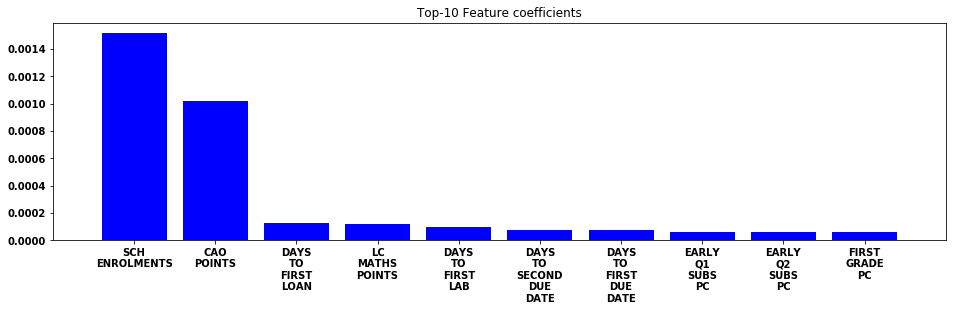

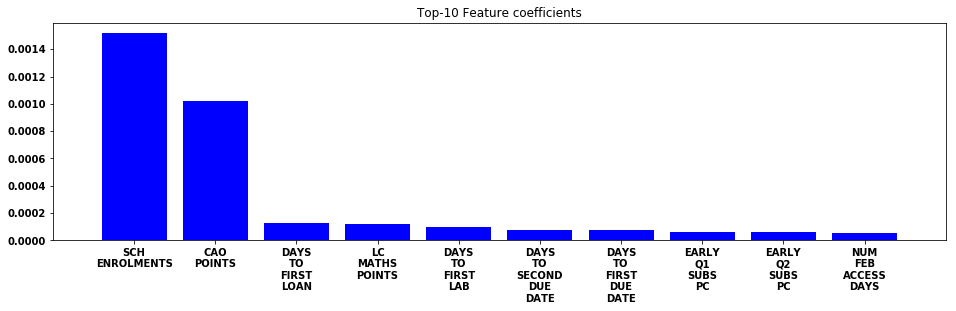

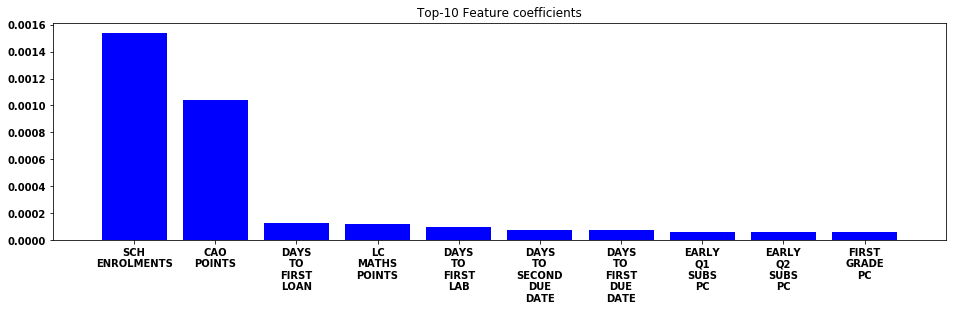

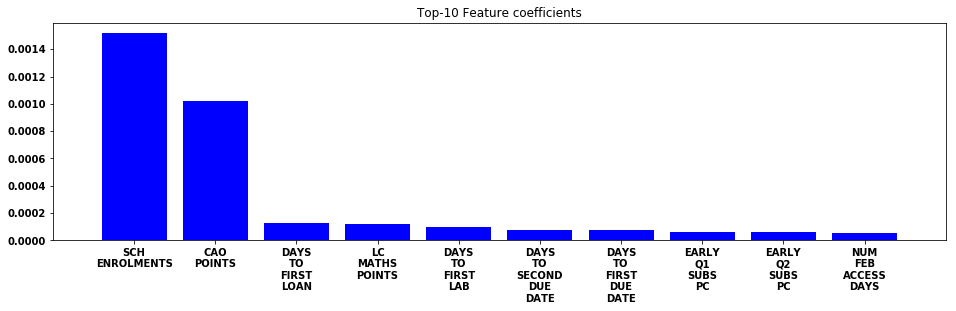

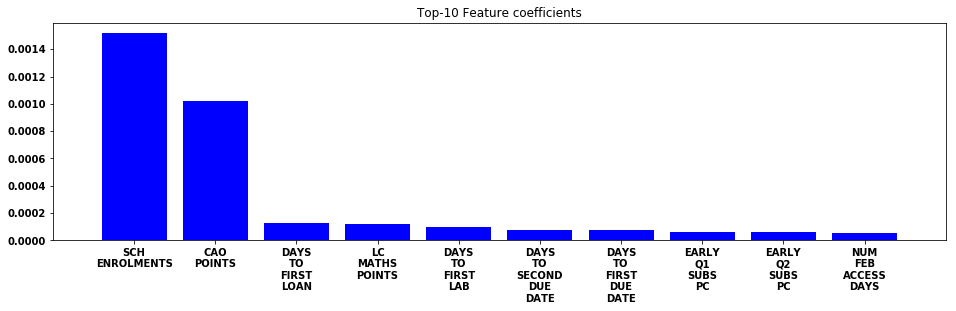

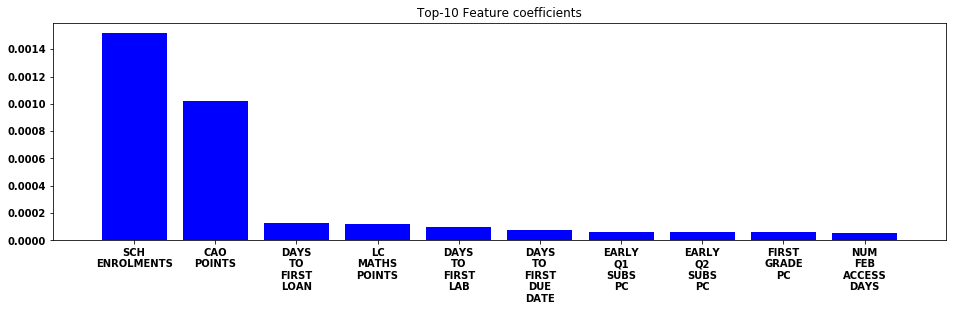

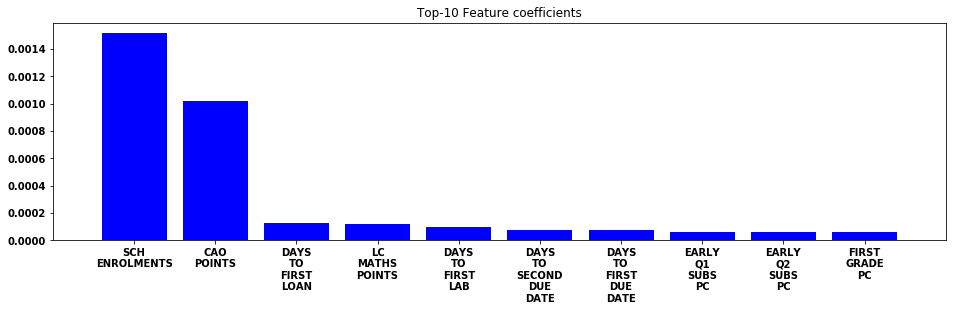

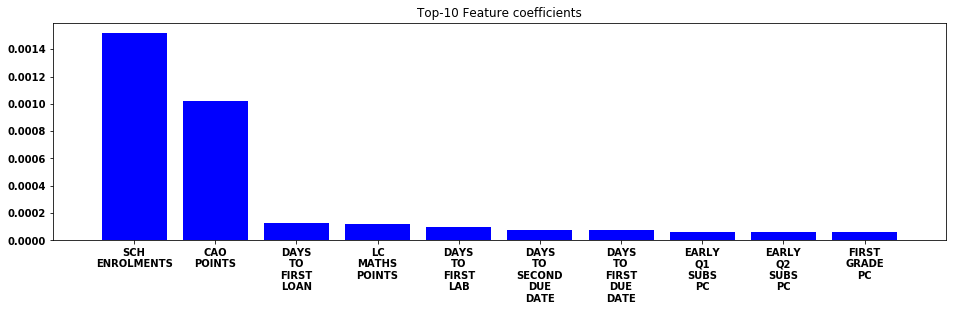

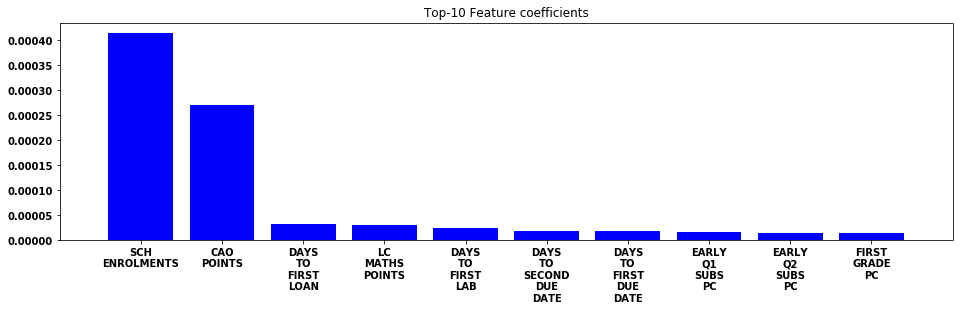

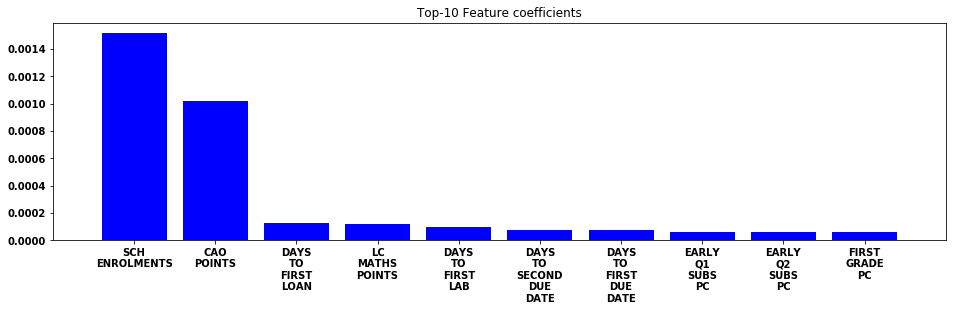

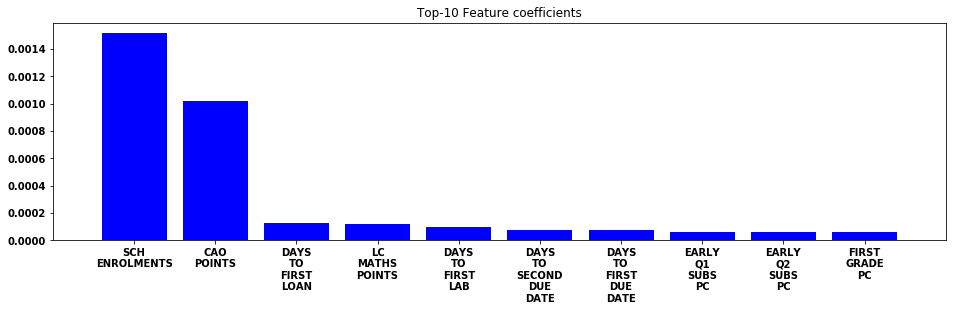

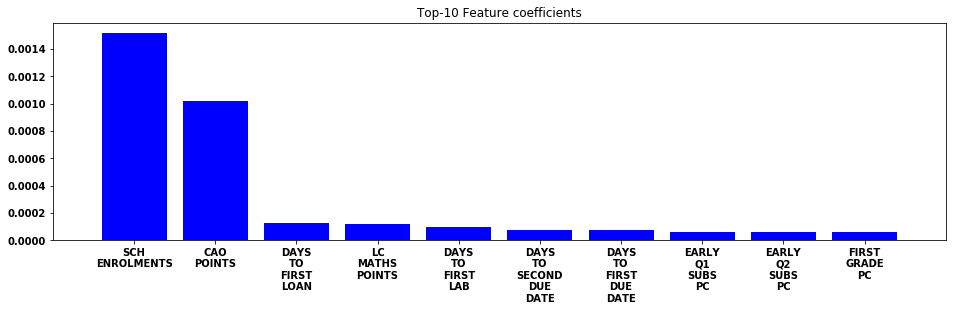

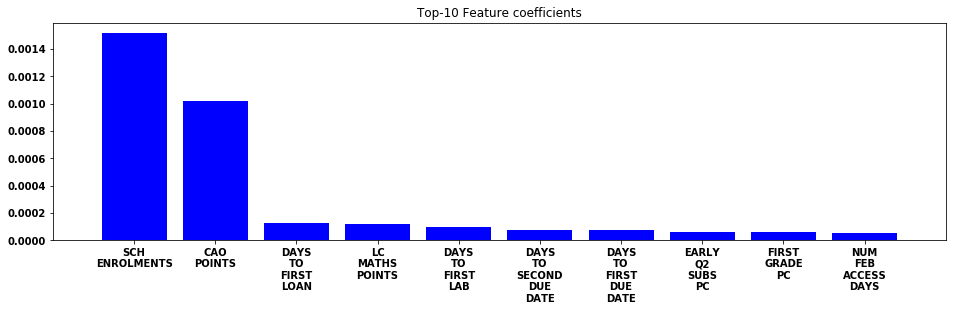

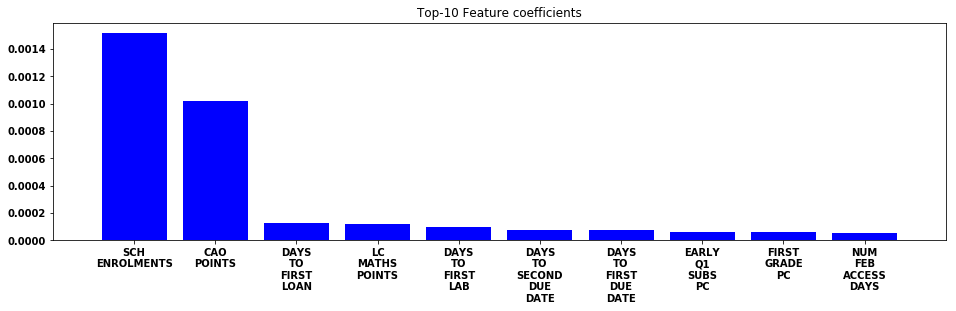

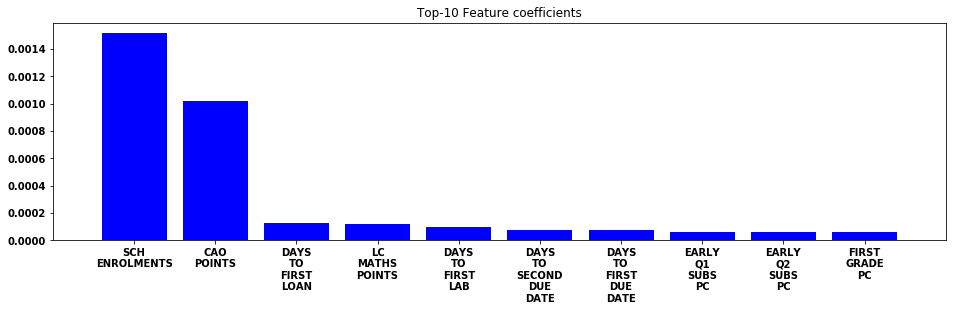

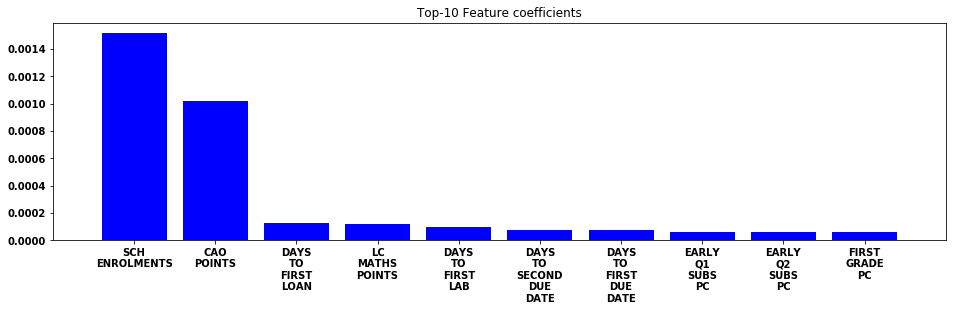

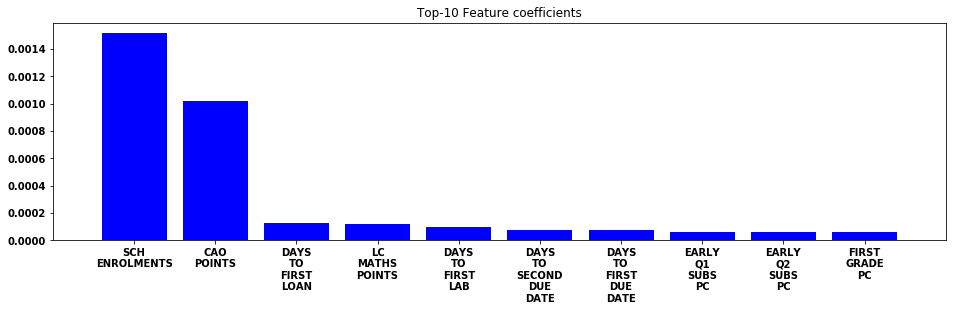

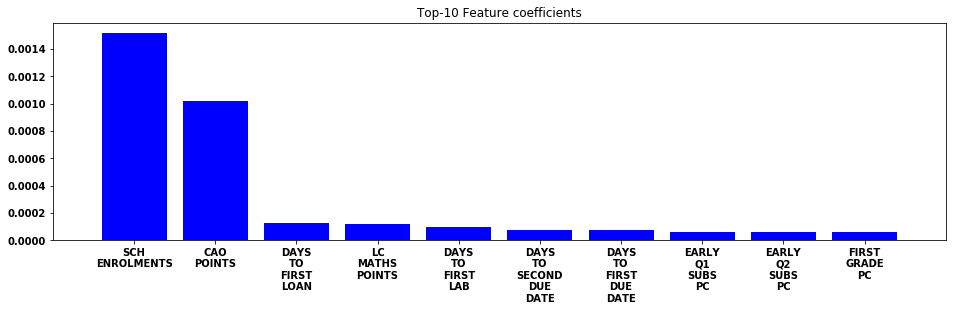

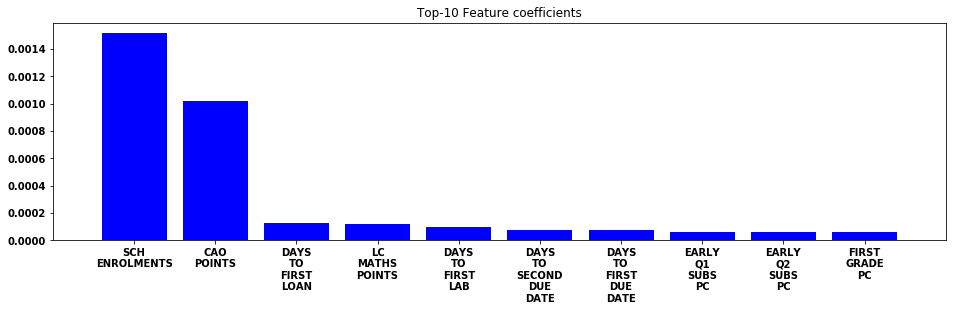

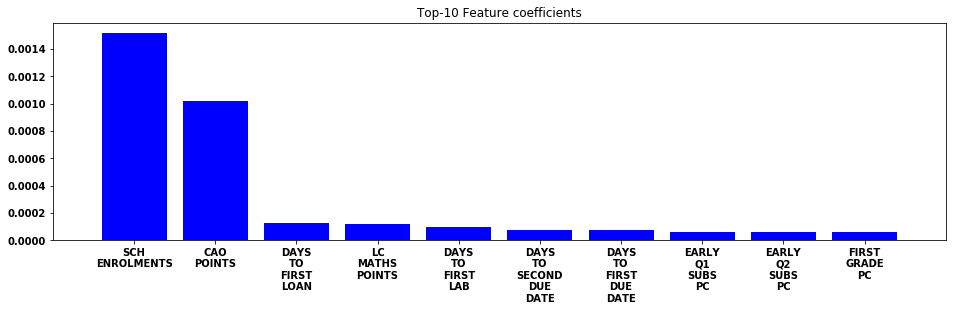

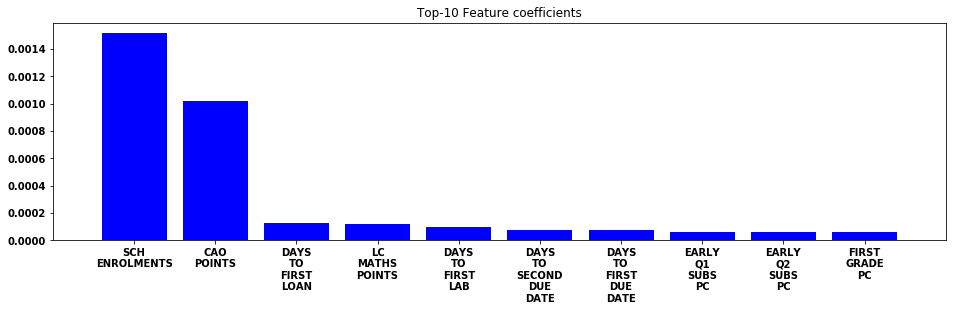

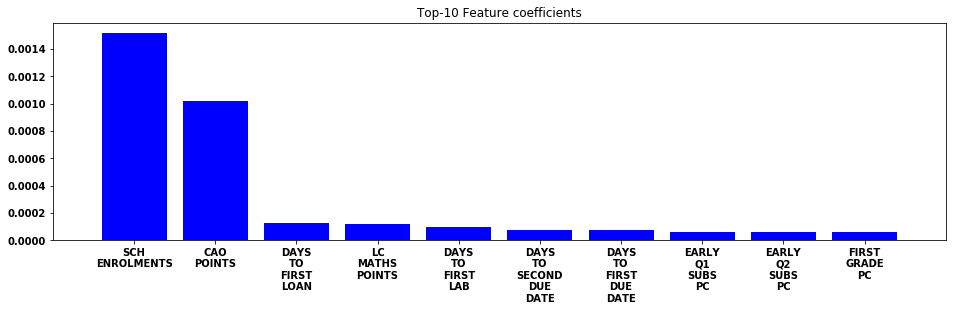

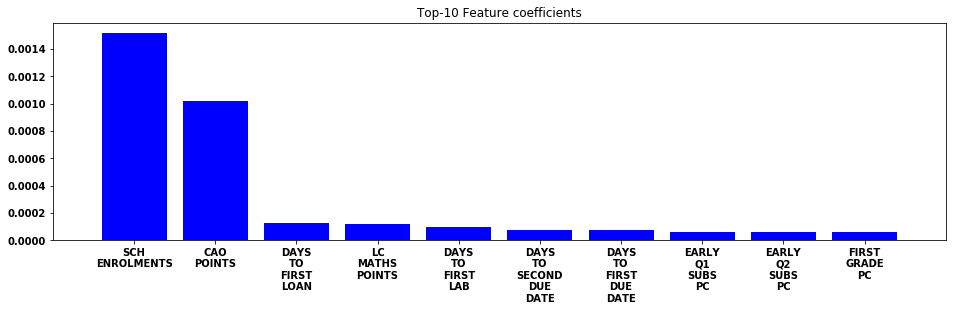

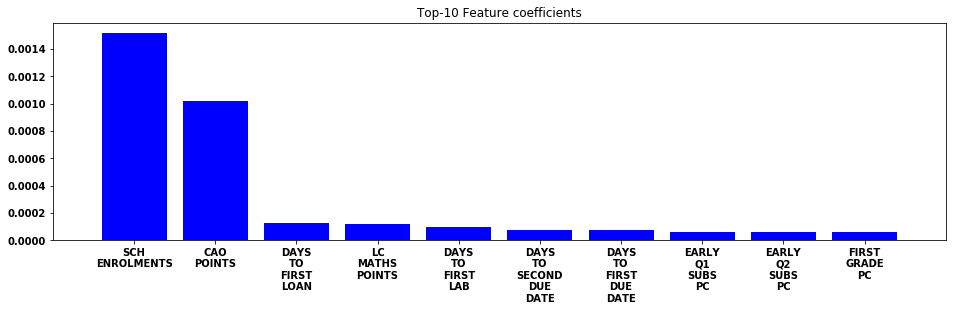

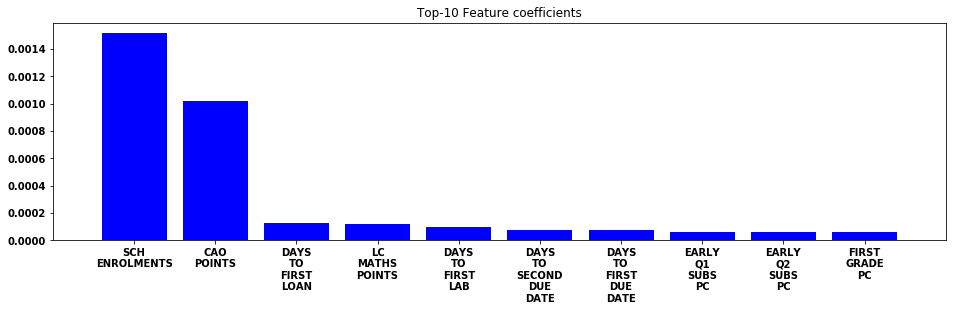

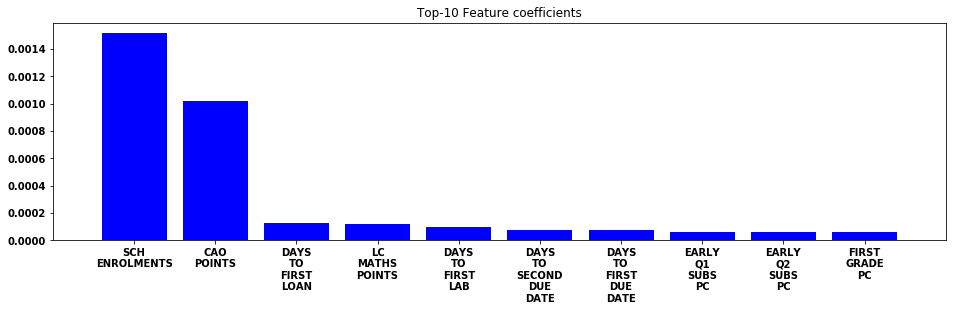

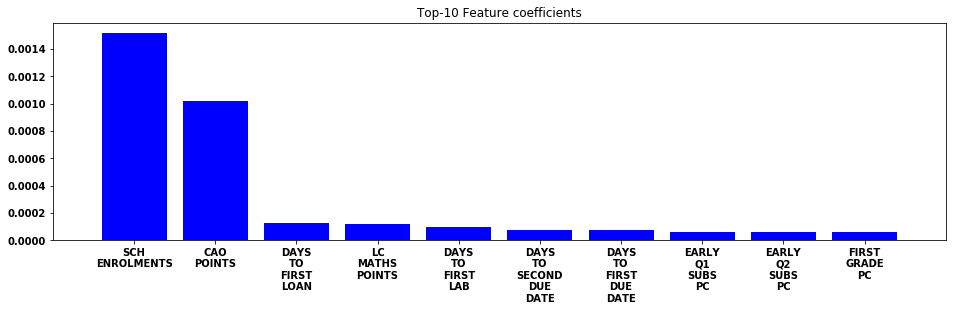

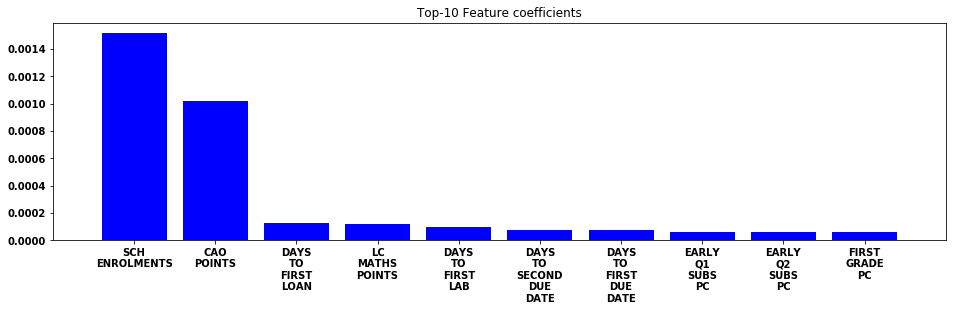

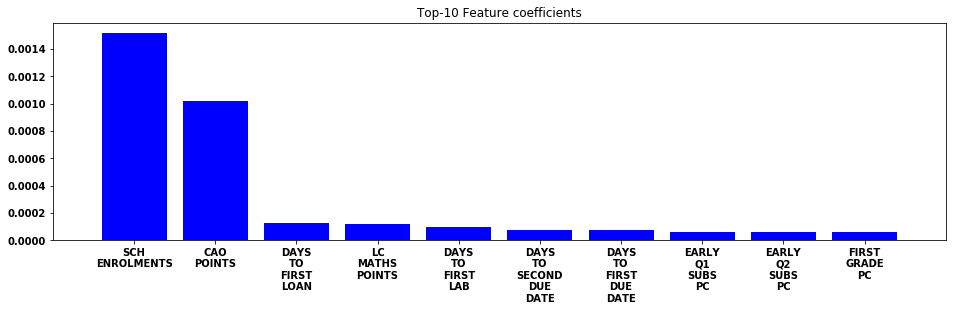

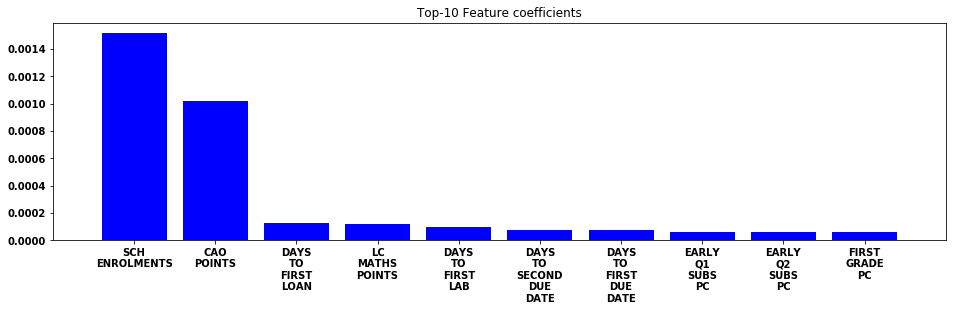

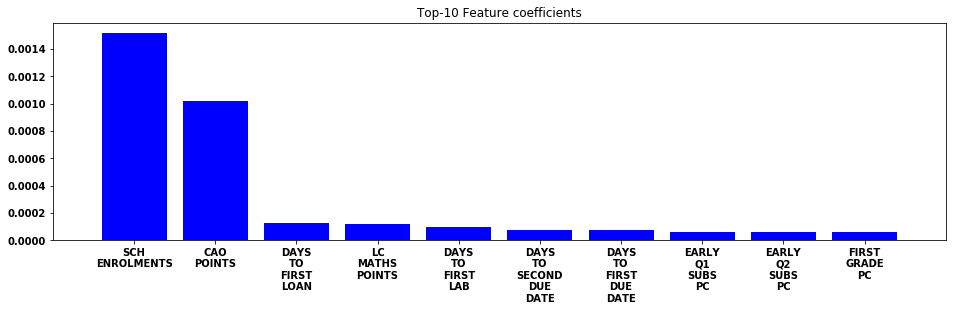

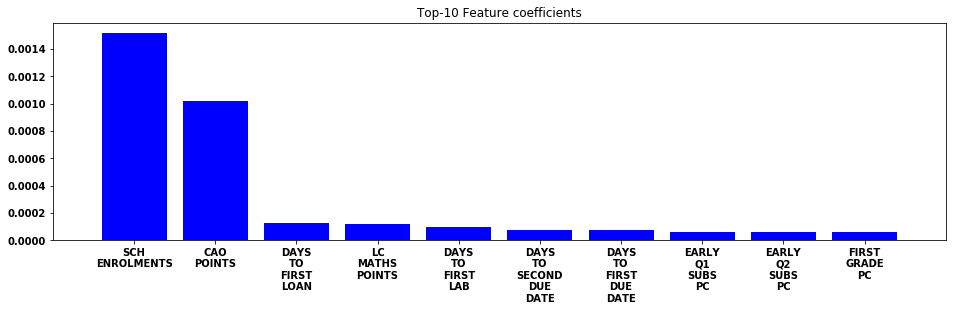

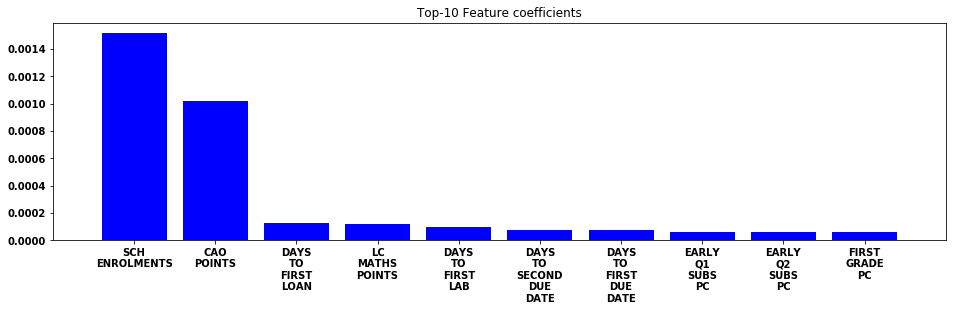

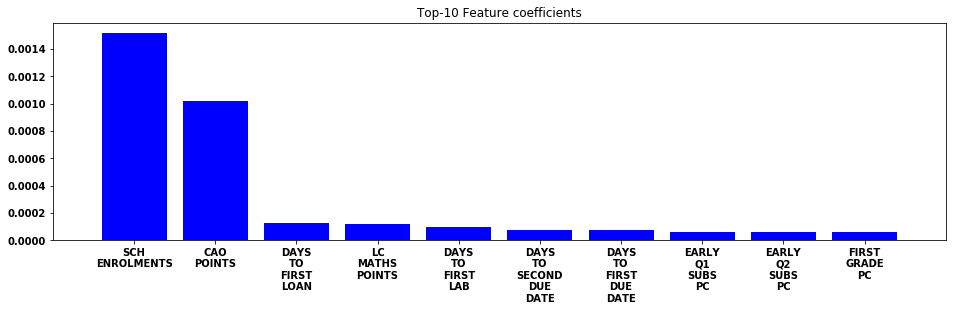

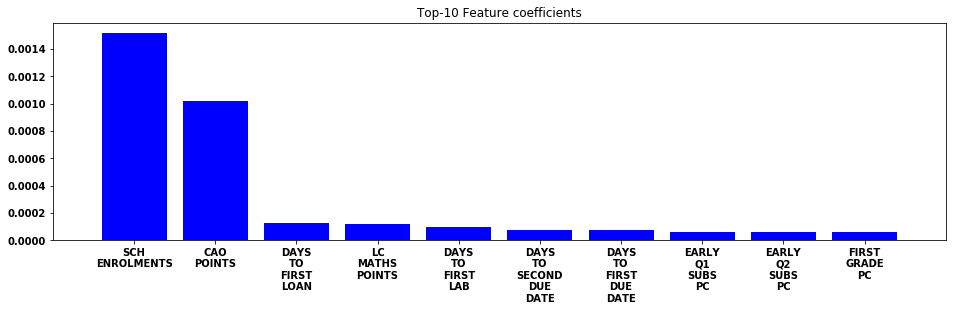

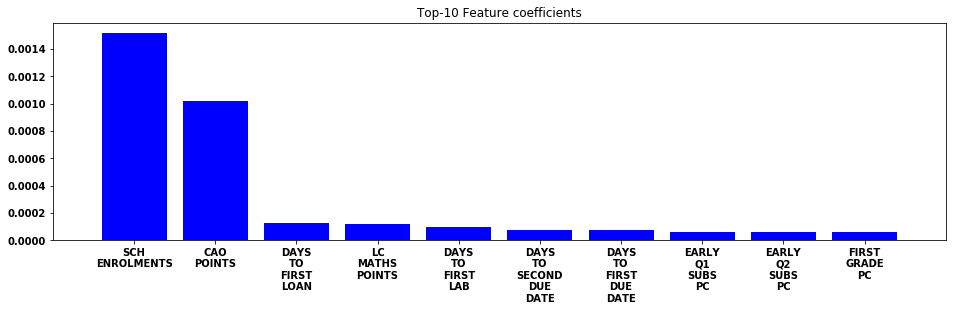

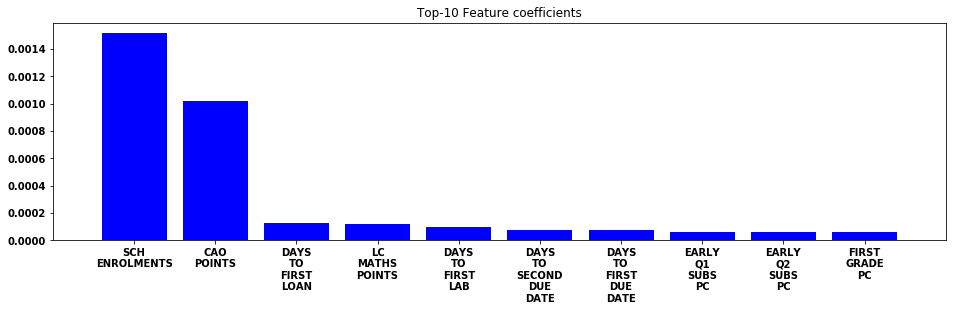

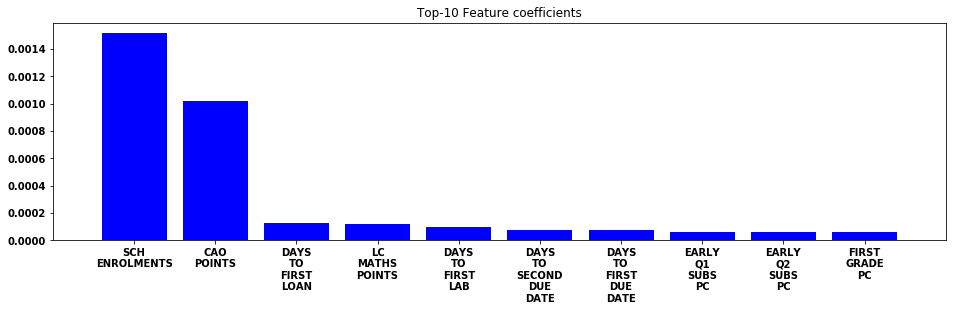

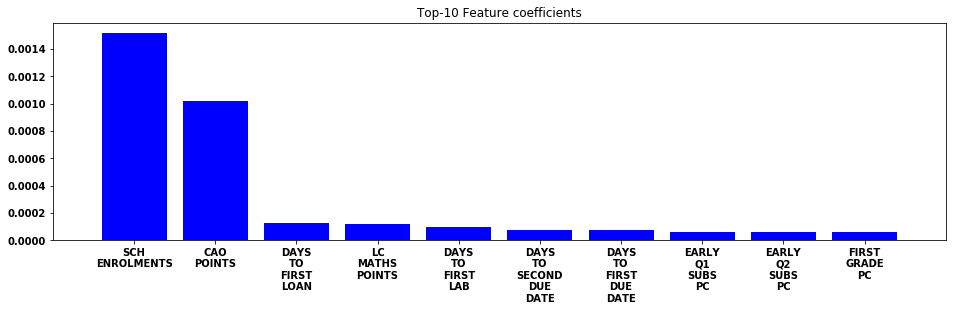

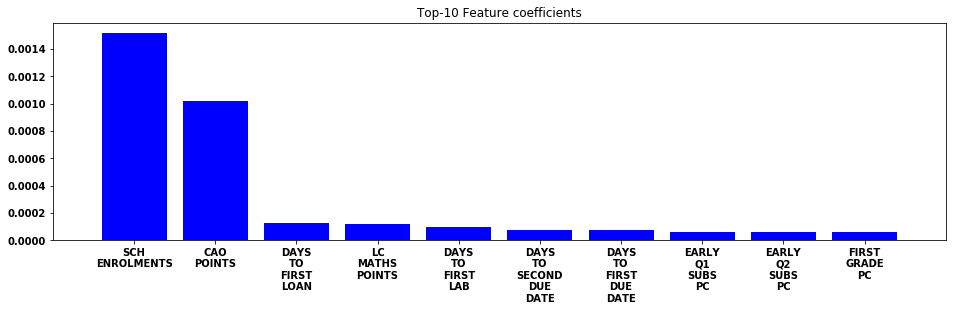

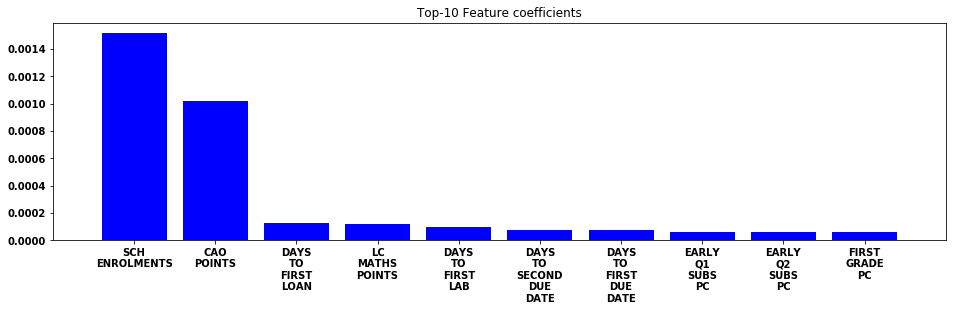

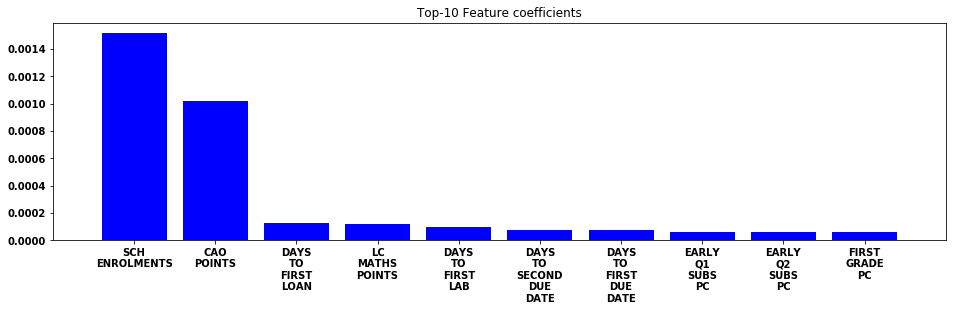

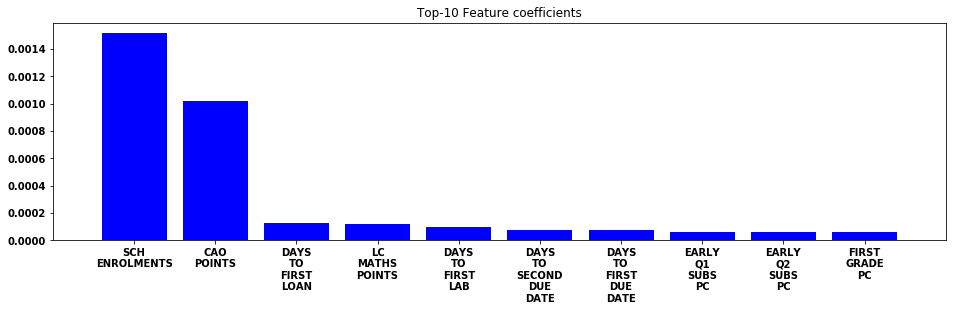

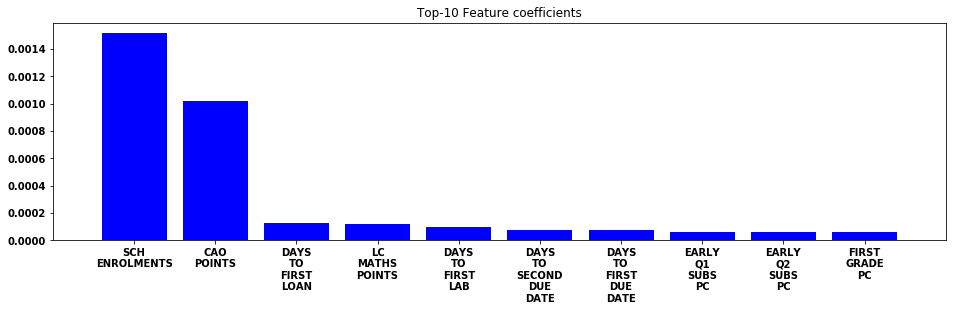

In [111]:
for column_name in original_columns:
    
    print('Leaving Column {} out'.format(column_name))
    
    # Columns to drop
    cols_to_drop = [ feature_name for feature_name in feature_names if feature_name.startswith(column_name) ]
    print(cols_to_drop)
    # Indexes to drop
    indexes_to_drop = [ feature_names.index(col) for col in cols_to_drop ]
    # Deep copy of the list
    features = feature_names[:] # or list(feature_names)
    for index in sorted(indexes_to_drop, reverse=True):
        del features[index]
    
    # New train and test sets
    X_mini_train = np.delete(X_train, indexes_to_drop, axis=1)
    X_mini_test = np.delete(X_test, indexes_to_drop, axis=1)
    
    # model
    model = LogisticRegression(random_state=42)
    # train
    model.fit(X_mini_train, y_train)
    # scores
    score = model.score(X_mini_test, y_test)
    r2 = r2_score(y_test_int, y_pred_int)
    mse = mean_squared_error(y_test_int, y_pred_int)
    print('Score: {:0.4f}\t R2:{:0.4f}\t MSE:{:0.4f}'.format(v['score'], v['r2'], v['mse']))
    
    coefficients = model.coef_[0]
    indices = np.argsort(coefficients)[::-1]
    print_top_features(features, coefficients, indices)
    plot_top_features(column_name, features, coefficients, indices)

    print()